In [1]:
import pyarrow.parquet as pq
import pandas as pd
import os
import re

# Define the directory where the Parquet files are saved
output_dir = 'C:/Users/19258/Downloads/parquet'

# List all Parquet files in the output directory
parquet_files = [f for f in os.listdir(output_dir) if f.endswith('.parquet')]

# List to store DataFrame chunks
df_list = []

# Load each Parquet file and append it to the list
for file in parquet_files:
    file_path = os.path.join(output_dir, file)
    
    # Read the Parquet file into a PyArrow Table
    table = pq.read_table(file_path)
    
    # Convert the PyArrow Table to a pandas DataFrame
    df_chunk = table.to_pandas()
    
    # Append the chunk to the list
    df_list.append(df_chunk)

# Concatenate all the chunks into a single DataFrame
df_full = pd.concat(df_list, ignore_index=True)

# Ensure the 'pgn' column exists
if 'pgn' in df_full.columns:
    # Define the regular expression for date extraction
    DatePattern = r"UTCDate .\d+.\d+.\d+"
    
    # Extract dates from the 'pgn' column
    df_full['extracted_dates'] = df_full['pgn'].apply(lambda x: re.findall(DatePattern, x))
    
    # Flatten the list of extracted dates and create a new DataFrame
    df_full['extracted_dates'] = df_full['extracted_dates'].apply(lambda x: x[0] if x else None)
else:
    print("Column 'pgn' not found in the DataFrame.")

# Display the updated DataFrame

print(df_full)


            Moves Timestamps  Stockfish Analysis  \
0           1. e4    0:03:00                -9.0   
1         1... e5    0:03:00                28.0   
2          2. Nc3  0:02:59.9                -4.0   
3        2... Nc6  0:02:59.5                17.0   
4          3. Bc4  0:02:58.6               -18.0   
...           ...        ...                 ...   
968412    57. Rc7  0:00:35.6               -37.0   
968413  57... Kb8  0:01:25.4                41.0   
968414    58. Rb7  0:00:31.2                 0.0   
968415  58... Ka8  0:01:24.6                43.0   
968416    59. Ra7  0:00:27.6                 0.0   

                                                 url  \
0        https://www.chess.com/game/live/25201246573   
1        https://www.chess.com/game/live/25201246573   
2        https://www.chess.com/game/live/25201246573   
3        https://www.chess.com/game/live/25201246573   
4        https://www.chess.com/game/live/25201246573   
...                                    

In [2]:
if 'extracted_dates' in df_full.columns:
    df_full['extracted_dates'] = df_full['extracted_dates'].str[9:]
df_full['extracted_dates'] = pd.to_datetime(df_full['extracted_dates'], format='%Y.%m.%d', errors='coerce')

# Extract individual features from the datetime column
df_full['year'] = df_full['extracted_dates'].dt.year
df_full['month'] = df_full['extracted_dates'].dt.month
df_full['day'] = df_full['extracted_dates'].dt.day
df_full['day_of_week'] = df_full['extracted_dates'].dt.dayofweek  # Monday=0, Sunday=6
df_full

,Moves,Timestamps,Stockfish Analysis,url,pgn,time_control,end_time,rated,tcn,uuid,...,accuracies.white,accuracies.black,start_time,current_elo,opponent_elo,extracted_dates,year,month,day,day_of_week
0,1. e4,0:03:00,-9.0,https://www.chess.com/game/live/25201246573,"[Event ""Live Chess""]\n[Site ""Chess.com""]\n[Dat...",180,1631462273,True,mC0Kbs5QfA!TltQGArGrirZJsJTJCJ7JkAJogvohemhdmd...,f60cdc1f-13e1-11ec-b546-09ff3c010001,...,NaN,NaN,NaN,1145,1184,2021-09-12,2021,9,12,6
1,1... e5,0:03:00,28.0,https://www.chess.com/game/live/25201246573,"[Event ""Live Chess""]\n[Site ""Chess.com""]\n[Dat...",180,1631462273,True,mC0Kbs5QfA!TltQGArGrirZJsJTJCJ7JkAJogvohemhdmd...,f60cdc1f-13e1-11ec-b546-09ff3c010001,...,NaN,NaN,NaN,1145,1184,2021-09-12,2021,9,12,6
2,2. Nc3,0:02:59.9,-4.0,https://www.chess.com/game/live/25201246573,"[Event ""Live Chess""]\n[Site ""Chess.com""]\n[Dat...",180,1631462273,True,mC0Kbs5QfA!TltQGArGrirZJsJTJCJ7JkAJogvohemhdmd...,f60cdc1f-13e1-11ec-b546-09ff3c010001,...,NaN,NaN,NaN,1145,1184,2021-09-12,2021,9,12,6
3,2... Nc6,0:02:59.5,17.0,https://www.chess.com/game/live/25201246573,"[Event ""Live Chess""]\n[Site ""Chess.com""]\n[Dat...",180,1631462273,True,mC0Kbs5QfA!TltQGArGrirZJsJTJCJ7JkAJogvohemhdmd...,f60cdc1f-13e1-11ec-b546-09ff3c010001,...,NaN,NaN,NaN,1145,1184,2021-09-12,2021,9,12,6
4,3. Bc4,0:02:58.6,-18.0,https://www.chess.com/game/live/25201246573,"[Event ""Live Chess""]\n[Site ""Chess.com""]\n[Dat...",180,1631462273,True,mC0Kbs5QfA!TltQGArGrirZJsJTJCJ7JkAJogvohemhdmd...,f60cdc1f-13e1-11ec-b546-09ff3c010001,...,NaN,NaN,NaN,1145,1184,2021-09-12,2021,9,12,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968412,57. Rc7,0:00:35.6,-37.0,https://www.chess.com/game/live/129678563053,"[Event ""Live Chess""]\n[Site ""Chess.com""]\n[Dat...",180,1735939841,True,lBZJkA!TbsYQcM6Lgv0Smu3VMF2MFwTCsCLCft92tCJCvK...,54ea2a2e-ca19-11ef-ad47-6cfe544c0428,...,78.7,78.02,NaN,1641,1661,2025-01-03,2025,1,3,4
968413,57... Kb8,0:01:25.4,41.0,https://www.chess.com/game/live/129678563053,"[Event ""Live Chess""]\n[Site ""Chess.com""]\n[Dat...",180,1735939841,True,lBZJkA!TbsYQcM6Lgv0Smu3VMF2MFwTCsCLCft92tCJCvK...,54ea2a2e-ca19-11ef-ad47-6cfe544c0428,...,78.7,78.02,NaN,1641,1661,2025-01-03,2025,1,3,4
968414,58. Rb7,0:00:31.2,0.0,https://www.chess.com/game/live/129678563053,"[Event ""Live Chess""]\n[Site ""Chess.com""]\n[Dat...",180,1735939841,True,lBZJkA!TbsYQcM6Lgv0Smu3VMF2MFwTCsCLCft92tCJCvK...,54ea2a2e-ca19-11ef-ad47-6cfe544c0428,...,78.7,78.02,NaN,1641,1661,2025-01-03,2025,1,3,4
968415,58... Ka8,0:01:24.6,43.0,https://www.chess.com/game/live/129678563053,"[Event ""Live Chess""]\n[Site ""Chess.com""]\n[Dat...",180,1735939841,True,lBZJkA!TbsYQcM6Lgv0Smu3VMF2MFwTCsCLCft92tCJCvK...,54ea2a2e-ca19-11ef-ad47-6cfe544c0428,...,78.7,78.02,NaN,1641,1661,2025-01-03,2025,1,3,4


In [3]:
def time_to_seconds(time_str):
    # Split the time string into hours, minutes, and seconds
    #print(time_str)
    parts = time_str.split(':')
    hours = int(parts[0])  # Always present
    minutes = int(parts[1])  # Always present
    seconds = parts[2]  # Can have decimal points or not
    
    # If seconds contains a decimal, split it into seconds and tenths
    if '.' in seconds:
        seconds, tenths = map(int, seconds.split('.'))
    else:
        seconds = int(seconds)
        tenths = 0  # Default to 0 if no tenths are present

    # Calculate total seconds
    total_seconds = (hours * 3600) + (minutes * 60) + seconds + (tenths / 10)
    return total_seconds
result_df=df_full

result_df['Timestamps'] = result_df['Timestamps'].apply(time_to_seconds)


In [4]:
import pandas as pd

# Example DataFrame

# Function to transform the chess move into a float
def move_to_float(move):
    # Extract the move number and dots
    import re
    match = re.match(r"(\d+)(\.{1,3})", move)
    if match:
        move_number = int(match.group(1))  # Extract the move number
        dots = match.group(2)  # Extract the dots
        
        # Determine if it's white's or black's move
        if dots == '.':
            return float(move_number)  # White's move
        elif dots == '...':
            return float(move_number) + 0.5  # Black's move
    return None  # Return None if parsing fails

# Apply the transformation to the DataFrame
result_df['Moves'] = result_df['Moves'].apply(move_to_float)

(result_df)


,Moves,Timestamps,Stockfish Analysis,url,pgn,time_control,end_time,rated,tcn,uuid,...,accuracies.white,accuracies.black,start_time,current_elo,opponent_elo,extracted_dates,year,month,day,day_of_week
0,1.0,180.0,-9.0,https://www.chess.com/game/live/25201246573,"[Event ""Live Chess""]\n[Site ""Chess.com""]\n[Dat...",180,1631462273,True,mC0Kbs5QfA!TltQGArGrirZJsJTJCJ7JkAJogvohemhdmd...,f60cdc1f-13e1-11ec-b546-09ff3c010001,...,NaN,NaN,NaN,1145,1184,2021-09-12,2021,9,12,6
1,1.5,180.0,28.0,https://www.chess.com/game/live/25201246573,"[Event ""Live Chess""]\n[Site ""Chess.com""]\n[Dat...",180,1631462273,True,mC0Kbs5QfA!TltQGArGrirZJsJTJCJ7JkAJogvohemhdmd...,f60cdc1f-13e1-11ec-b546-09ff3c010001,...,NaN,NaN,NaN,1145,1184,2021-09-12,2021,9,12,6
2,2.0,179.9,-4.0,https://www.chess.com/game/live/25201246573,"[Event ""Live Chess""]\n[Site ""Chess.com""]\n[Dat...",180,1631462273,True,mC0Kbs5QfA!TltQGArGrirZJsJTJCJ7JkAJogvohemhdmd...,f60cdc1f-13e1-11ec-b546-09ff3c010001,...,NaN,NaN,NaN,1145,1184,2021-09-12,2021,9,12,6
3,2.5,179.5,17.0,https://www.chess.com/game/live/25201246573,"[Event ""Live Chess""]\n[Site ""Chess.com""]\n[Dat...",180,1631462273,True,mC0Kbs5QfA!TltQGArGrirZJsJTJCJ7JkAJogvohemhdmd...,f60cdc1f-13e1-11ec-b546-09ff3c010001,...,NaN,NaN,NaN,1145,1184,2021-09-12,2021,9,12,6
4,3.0,178.6,-18.0,https://www.chess.com/game/live/25201246573,"[Event ""Live Chess""]\n[Site ""Chess.com""]\n[Dat...",180,1631462273,True,mC0Kbs5QfA!TltQGArGrirZJsJTJCJ7JkAJogvohemhdmd...,f60cdc1f-13e1-11ec-b546-09ff3c010001,...,NaN,NaN,NaN,1145,1184,2021-09-12,2021,9,12,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968412,57.0,35.6,-37.0,https://www.chess.com/game/live/129678563053,"[Event ""Live Chess""]\n[Site ""Chess.com""]\n[Dat...",180,1735939841,True,lBZJkA!TbsYQcM6Lgv0Smu3VMF2MFwTCsCLCft92tCJCvK...,54ea2a2e-ca19-11ef-ad47-6cfe544c0428,...,78.7,78.02,NaN,1641,1661,2025-01-03,2025,1,3,4
968413,57.5,85.4,41.0,https://www.chess.com/game/live/129678563053,"[Event ""Live Chess""]\n[Site ""Chess.com""]\n[Dat...",180,1735939841,True,lBZJkA!TbsYQcM6Lgv0Smu3VMF2MFwTCsCLCft92tCJCvK...,54ea2a2e-ca19-11ef-ad47-6cfe544c0428,...,78.7,78.02,NaN,1641,1661,2025-01-03,2025,1,3,4
968414,58.0,31.2,0.0,https://www.chess.com/game/live/129678563053,"[Event ""Live Chess""]\n[Site ""Chess.com""]\n[Dat...",180,1735939841,True,lBZJkA!TbsYQcM6Lgv0Smu3VMF2MFwTCsCLCft92tCJCvK...,54ea2a2e-ca19-11ef-ad47-6cfe544c0428,...,78.7,78.02,NaN,1641,1661,2025-01-03,2025,1,3,4
968415,58.5,84.6,43.0,https://www.chess.com/game/live/129678563053,"[Event ""Live Chess""]\n[Site ""Chess.com""]\n[Dat...",180,1735939841,True,lBZJkA!TbsYQcM6Lgv0Smu3VMF2MFwTCsCLCft92tCJCvK...,54ea2a2e-ca19-11ef-ad47-6cfe544c0428,...,78.7,78.02,NaN,1641,1661,2025-01-03,2025,1,3,4


In [5]:


import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

# Clean and convert the "Moves" column
result_df['Moves'] = result_df['Moves'].astype(float)
result_df




,Moves,Timestamps,Stockfish Analysis,url,pgn,time_control,end_time,rated,tcn,uuid,...,accuracies.white,accuracies.black,start_time,current_elo,opponent_elo,extracted_dates,year,month,day,day_of_week
0,1.0,180.0,-9.0,https://www.chess.com/game/live/25201246573,"[Event ""Live Chess""]\n[Site ""Chess.com""]\n[Dat...",180,1631462273,True,mC0Kbs5QfA!TltQGArGrirZJsJTJCJ7JkAJogvohemhdmd...,f60cdc1f-13e1-11ec-b546-09ff3c010001,...,NaN,NaN,NaN,1145,1184,2021-09-12,2021,9,12,6
1,1.5,180.0,28.0,https://www.chess.com/game/live/25201246573,"[Event ""Live Chess""]\n[Site ""Chess.com""]\n[Dat...",180,1631462273,True,mC0Kbs5QfA!TltQGArGrirZJsJTJCJ7JkAJogvohemhdmd...,f60cdc1f-13e1-11ec-b546-09ff3c010001,...,NaN,NaN,NaN,1145,1184,2021-09-12,2021,9,12,6
2,2.0,179.9,-4.0,https://www.chess.com/game/live/25201246573,"[Event ""Live Chess""]\n[Site ""Chess.com""]\n[Dat...",180,1631462273,True,mC0Kbs5QfA!TltQGArGrirZJsJTJCJ7JkAJogvohemhdmd...,f60cdc1f-13e1-11ec-b546-09ff3c010001,...,NaN,NaN,NaN,1145,1184,2021-09-12,2021,9,12,6
3,2.5,179.5,17.0,https://www.chess.com/game/live/25201246573,"[Event ""Live Chess""]\n[Site ""Chess.com""]\n[Dat...",180,1631462273,True,mC0Kbs5QfA!TltQGArGrirZJsJTJCJ7JkAJogvohemhdmd...,f60cdc1f-13e1-11ec-b546-09ff3c010001,...,NaN,NaN,NaN,1145,1184,2021-09-12,2021,9,12,6
4,3.0,178.6,-18.0,https://www.chess.com/game/live/25201246573,"[Event ""Live Chess""]\n[Site ""Chess.com""]\n[Dat...",180,1631462273,True,mC0Kbs5QfA!TltQGArGrirZJsJTJCJ7JkAJogvohemhdmd...,f60cdc1f-13e1-11ec-b546-09ff3c010001,...,NaN,NaN,NaN,1145,1184,2021-09-12,2021,9,12,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968412,57.0,35.6,-37.0,https://www.chess.com/game/live/129678563053,"[Event ""Live Chess""]\n[Site ""Chess.com""]\n[Dat...",180,1735939841,True,lBZJkA!TbsYQcM6Lgv0Smu3VMF2MFwTCsCLCft92tCJCvK...,54ea2a2e-ca19-11ef-ad47-6cfe544c0428,...,78.7,78.02,NaN,1641,1661,2025-01-03,2025,1,3,4
968413,57.5,85.4,41.0,https://www.chess.com/game/live/129678563053,"[Event ""Live Chess""]\n[Site ""Chess.com""]\n[Dat...",180,1735939841,True,lBZJkA!TbsYQcM6Lgv0Smu3VMF2MFwTCsCLCft92tCJCvK...,54ea2a2e-ca19-11ef-ad47-6cfe544c0428,...,78.7,78.02,NaN,1641,1661,2025-01-03,2025,1,3,4
968414,58.0,31.2,0.0,https://www.chess.com/game/live/129678563053,"[Event ""Live Chess""]\n[Site ""Chess.com""]\n[Dat...",180,1735939841,True,lBZJkA!TbsYQcM6Lgv0Smu3VMF2MFwTCsCLCft92tCJCvK...,54ea2a2e-ca19-11ef-ad47-6cfe544c0428,...,78.7,78.02,NaN,1641,1661,2025-01-03,2025,1,3,4
968415,58.5,84.6,43.0,https://www.chess.com/game/live/129678563053,"[Event ""Live Chess""]\n[Site ""Chess.com""]\n[Dat...",180,1735939841,True,lBZJkA!TbsYQcM6Lgv0Smu3VMF2MFwTCsCLCft92tCJCvK...,54ea2a2e-ca19-11ef-ad47-6cfe544c0428,...,78.7,78.02,NaN,1641,1661,2025-01-03,2025,1,3,4


In [6]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

# Label Encoder for time_class
label_encoder = LabelEncoder()

# Define the target variable
y = result_df[["current_elo"]]

# Define features
features = ["time_class","Moves", "opponent_elo", "current_elo", "Timestamps", "Moves", "Stockfish Analysis", "time_control","year","month","day","day_of_week"]

# Ensure 'time_class' is transformed
if 'time_class' in features:
    result_df['time_class'] = label_encoder.fit_transform(result_df['time_class'])

# Function to safely evaluate strings to floats
def safe_eval(value):
    try:
        # Only evaluate if the value seems like an expression
        if isinstance(value, str) and value.strip():  # Check if it's a non-empty string
            return float(eval(value))  # Evaluate the expression and convert to float
        else:
            return value  # Return the original value if it isn't an evaluable string
    except:
        return np.nan  # Return NaN if the evaluation fails

# Apply the safe_eval function column by column
for col in features:
    result_df[col] = result_df[col].apply(safe_eval)

# Now normalize the features
scaler = MinMaxScaler()
X = scaler.fit_transform(result_df[features])  # Normalized feature matrix

# Define multi-output target
y = result_df[["current_elo"]].to_numpy()  # Multi-output target

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Output shapes for debugging
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)
print(result_df[features])


X_train shape: (774733, 12)
y_train shape: (774733, 1)
X_test shape: (193684, 12)
y_test shape: (193684, 1)
        time_class  Moves  opponent_elo  current_elo  Timestamps  Moves  \
0                0    1.0          1184         1145       180.0    1.0   
1                0    1.5          1184         1145       180.0    1.5   
2                0    2.0          1184         1145       179.9    2.0   
3                0    2.5          1184         1145       179.5    2.5   
4                0    3.0          1184         1145       178.6    3.0   
...            ...    ...           ...          ...         ...    ...   
968412           0   57.0          1661         1641        35.6   57.0   
968413           0   57.5          1661         1641        85.4   57.5   
968414           0   58.0          1661         1641        31.2   58.0   
968415           0   58.5          1661         1641        84.6   58.5   
968416           0   59.0          1661         1641        27.6   

In [7]:
"""import torch
import torch.nn as nn
from torch.optim import Adam
from torch.utils.data import DataLoader, TensorDataset

# Device setup for DirectML (Intel GPU)
import torch_directml
device = torch_directml.device()

# Define the neural network
class ChessNN(nn.Module):
    def __init__(self, input_dim):
        super(ChessNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 32)
        self.fc4 = nn.Linear(32, 16)
        self.fc5 = nn.Linear(16, 8)
        self.output = nn.Linear(8, 2)  # Two outputs: current_elo and time_control

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = torch.relu(self.fc4(x))
        x = torch.relu(self.fc5(x))
        return self.output(x)

# Prepare data
X_train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).to(device)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).to(device)

# Use DataLoader for batch processing
batch_size = 64
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Initialize model, optimizer, and loss function
model = ChessNN(X_train.shape[1]).to(device)
optimizer = Adam(model.parameters(), lr=0.001)
loss_fn = nn.MSELoss()

# Training loop
epochs = 10
for epoch in range(epochs):
    model.train()
    epoch_loss = 0.0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        predictions = model(X_batch)
        loss = loss_fn(predictions, y_batch)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    
    print(f"Epoch {epoch+1}/{epochs}, Loss: {epoch_loss/len(train_loader):.4f}")

# Evaluate on test set
model.eval()
with torch.no_grad():
    predictions = model(X_test_tensor)
    test_loss = loss_fn(predictions, y_test_tensor)
    print(f"Test Loss: {test_loss.item():.4f}")"""



'import torch\nimport torch.nn as nn\nfrom torch.optim import Adam\nfrom torch.utils.data import DataLoader, TensorDataset\n\n# Device setup for DirectML (Intel GPU)\nimport torch_directml\ndevice = torch_directml.device()\n\n# Define the neural network\nclass ChessNN(nn.Module):\n    def __init__(self, input_dim):\n        super(ChessNN, self).__init__()\n        self.fc1 = nn.Linear(input_dim, 128)\n        self.fc2 = nn.Linear(128, 64)\n        self.fc3 = nn.Linear(64, 32)\n        self.fc4 = nn.Linear(32, 16)\n        self.fc5 = nn.Linear(16, 8)\n        self.output = nn.Linear(8, 2)  # Two outputs: current_elo and time_control\n\n    def forward(self, x):\n        x = torch.relu(self.fc1(x))\n        x = torch.relu(self.fc2(x))\n        x = torch.relu(self.fc3(x))\n        x = torch.relu(self.fc4(x))\n        x = torch.relu(self.fc5(x))\n        return self.output(x)\n\n# Prepare data\nX_train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)\ny_train_tensor = torch.t

In [8]:
import torch
import torch.nn as nn
from torch.optim import Adam
from torch.utils.data import DataLoader, TensorDataset
from tqdm import tqdm
import random
import numpy as np

# Device setup
import torch_directml
device = torch_directml.device()

torch.backends.cudnn.benchmark = True
torch.manual_seed(42)
np.random.seed(42)
random.seed(42)

# Define the neural network
class SimpleChessNN(nn.Module):
    def __init__(self, input_dim):
        super(SimpleChessNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 32)
        self.fc4 = nn.Linear(32, 16)
        self.fc5 = nn.Linear(16, 8)
        self.output = nn.Linear(8, 1)
        self._initialize_weights()

    def _initialize_weights(self):
        for layer in self.modules():
            if isinstance(layer, nn.Linear):
                nn.init.xavier_uniform_(layer.weight)
                nn.init.zeros_(layer.bias)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = torch.relu(self.fc4(x))
        x = torch.relu(self.fc5(x))
        return self.output(x)

def train_model(model, optimizer, scheduler, loss_fn, train_loader, val_loader=None, epochs=20, patience=5):
    scaler = torch.cuda.amp.GradScaler()  # Enable mixed-precision training
    best_loss = float('inf')
    epochs_no_improve = 0

    for epoch in range(epochs):
        model.train()
        train_losses = []

        with tqdm(total=len(train_loader), desc=f"Epoch {epoch + 1}/{epochs}") as pbar:
            for X_batch, y_batch in train_loader:
                X_batch = X_batch.to(device, non_blocking=True)
                y_batch = y_batch.to(device, non_blocking=True)

                optimizer.zero_grad()
                with torch.cuda.amp.autocast():  # Mixed precision
                    predictions = model(X_batch)
                    loss = loss_fn(predictions, y_batch)
                scaler.scale(loss).backward()
                torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)  # Gradient clipping
                scaler.step(optimizer)
                scaler.update()

                train_losses.append(loss.item())
                pbar.set_postfix(loss=loss.item())
                pbar.update(1)

        # Validation Loss (optional)
        val_loss = None
        if val_loader:
            model.eval()
            val_losses = []
            with torch.no_grad():
                for X_val, y_val in val_loader:
                    X_val = X_val.to(device)
                    y_val = y_val.to(device)
                    val_predictions = model(X_val)
                    loss = loss_fn(val_predictions, y_val).item()
                    val_losses.append(loss)
            val_loss = np.median(val_losses)
            print(f"Validation Loss: {val_loss:.4f}")

        # Adjust learning rate using CyclicLR
        scheduler.step()

        # Early stopping logic
        median_train_loss = np.median(train_losses)
        print(f"Epoch {epoch + 1}: Train Loss = {median_train_loss:.4f}, Best Loss = {best_loss:.4f}")
        if val_loss and val_loss < best_loss:
            best_loss = val_loss
            epochs_no_improve = 0
        elif median_train_loss < best_loss:
            best_loss = median_train_loss
            epochs_no_improve = 0
        else:
            epochs_no_improve += 1

        if epochs_no_improve >= patience:
            print(f"Early stopping at epoch {epoch + 1}. Best Loss = {best_loss:.4f}")
            break

    return best_loss


# Random search for hyperparameters
def random_search(X_train, y_train, X_test, y_test, param_space, trials=10):
    results = []
    subset_size = min(10000, len(X_train))  # Use a subset for faster hyperparameter tuning
    X_train_subset = X_train[:subset_size]
    y_train_subset = y_train[:subset_size]

    for trial in range(trials):
        params = {key: random.choice(values) for key, values in param_space.items()}
        print(f"Trial {trial + 1}/{trials}: {params}")

        # Prepare data loaders
        batch_size = params['batch_size']
        train_dataset = TensorDataset(torch.tensor(X_train_subset, dtype=torch.float32),
                                       torch.tensor(y_train_subset, dtype=torch.float32))
        test_dataset = TensorDataset(torch.tensor(X_test, dtype=torch.float32),
                                      torch.tensor(y_test, dtype=torch.float32))

        train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, pin_memory=True, num_workers=4)
        test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, pin_memory=True, num_workers=4)

        model = SimpleChessNN(X_train.shape[1]).to(device)
        optimizer = Adam(model.parameters(), lr=params['lr'], weight_decay=params['weight_decay'])
        scheduler = torch.optim.lr_scheduler.CyclicLR(
            optimizer, base_lr=params['lr'] / 10, max_lr=params['lr'], step_size_up=200, mode='triangular'
        )
        loss_fn = nn.MSELoss()

        best_loss = train_model(model, optimizer, scheduler, loss_fn, train_loader, epochs=params['epochs'], patience=params['patience'])

        # Evaluate the model
        model.eval()
        with torch.no_grad():
            X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
            y_test_tensor = torch.tensor(y_test, dtype=torch.float32).to(device)
            predictions = model(X_test_tensor)
            test_loss = loss_fn(predictions, y_test_tensor).item()

        results.append((params, test_loss))
        print(f"Test Loss for Trial {trial + 1}: {test_loss:.4f}")

    best_params = min(results, key=lambda x: x[1])
    print(f"Best Parameters: {best_params[0]}, Test Loss: {best_params[1]:.4f}")
    return best_params


# Hyperparameter space
param_space = {
    'lr': [0.01, 0.001, 0.0001],
    'batch_size': [32, 64, 128],
    'weight_decay': [0, 1e-4, 1e-3],
    'epochs': [20,50,100],
    'patience': [10]
}
best_config = random_search(X_train, y_train, X_test, y_test, param_space, trials=10)


Trial 1/10: {'lr': 0.0001, 'batch_size': 32, 'weight_decay': 0, 'epochs': 100, 'patience': 10}


C:\Users\19258\AppData\Local\Temp\ipykernel_20644\147565009.py:45: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = torch.cuda.amp.GradScaler()  # Enable mixed-precision training
C:\Users\19258\Downloads\ana\Lib\site-packages\torch\amp\grad_scaler.py:132: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn(
Epoch 1/100:   0%|          | 0/313 [00:00<?, ?it/s]C:\Users\19258\AppData\Local\Temp\ipykernel_20644\147565009.py:59: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():  # Mixed precision
C:\Users\19258\Downloads\ana\Lib\site-packages\torch\amp\autocast_mode.py:265: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(
C:\Users\19258\Downloads\ana\Lib\site-packages\torch\optim\adam.py:534

Epoch 1: Train Loss = 2068158.0000, Best Loss = inf


Epoch 2/100: 100%|██████████| 313/313 [01:22<00:00,  3.80it/s, loss=2.31e+6]


Epoch 2: Train Loss = 2073358.7500, Best Loss = 2068158.0000


Epoch 3/100: 100%|██████████| 313/313 [01:11<00:00,  4.35it/s, loss=1.89e+6]


Epoch 3: Train Loss = 2066122.1250, Best Loss = 2068158.0000


Epoch 4/100: 100%|██████████| 313/313 [01:24<00:00,  3.71it/s, loss=1.99e+6]


Epoch 4: Train Loss = 2075991.5000, Best Loss = 2066122.1250


Epoch 5/100: 100%|██████████| 313/313 [01:16<00:00,  4.07it/s, loss=2.2e+6] 


Epoch 5: Train Loss = 2064805.0000, Best Loss = 2066122.1250


Epoch 6/100: 100%|██████████| 313/313 [01:21<00:00,  3.83it/s, loss=2.16e+6]


Epoch 6: Train Loss = 2056989.7500, Best Loss = 2064805.0000


Epoch 7/100: 100%|██████████| 313/313 [01:01<00:00,  5.12it/s, loss=1.77e+6]


Epoch 7: Train Loss = 2057679.7500, Best Loss = 2056989.7500


Epoch 8/100: 100%|██████████| 313/313 [01:09<00:00,  4.52it/s, loss=2.39e+6]


Epoch 8: Train Loss = 2041515.6250, Best Loss = 2056989.7500


Epoch 9/100: 100%|██████████| 313/313 [01:04<00:00,  4.88it/s, loss=2.04e+6]


Epoch 9: Train Loss = 2035327.7500, Best Loss = 2041515.6250


Epoch 10/100: 100%|██████████| 313/313 [01:06<00:00,  4.71it/s, loss=1.79e+6]


Epoch 10: Train Loss = 2030888.5000, Best Loss = 2035327.7500


Epoch 11/100: 100%|██████████| 313/313 [00:55<00:00,  5.69it/s, loss=2.24e+6]


Epoch 11: Train Loss = 2009825.0000, Best Loss = 2030888.5000


Epoch 12/100: 100%|██████████| 313/313 [00:49<00:00,  6.34it/s, loss=2.01e+6]


Epoch 12: Train Loss = 1990778.3750, Best Loss = 2009825.0000


Epoch 13/100: 100%|██████████| 313/313 [00:59<00:00,  5.29it/s, loss=2.12e+6]


Epoch 13: Train Loss = 1966158.5000, Best Loss = 1990778.3750


Epoch 14/100: 100%|██████████| 313/313 [01:01<00:00,  5.12it/s, loss=1.81e+6]


Epoch 14: Train Loss = 1934409.6250, Best Loss = 1966158.5000


Epoch 15/100: 100%|██████████| 313/313 [00:48<00:00,  6.40it/s, loss=2.09e+6]


Epoch 15: Train Loss = 1882795.5000, Best Loss = 1934409.6250


Epoch 16/100: 100%|██████████| 313/313 [01:00<00:00,  5.19it/s, loss=1.75e+6]


Epoch 16: Train Loss = 1828194.0000, Best Loss = 1882795.5000


Epoch 17/100: 100%|██████████| 313/313 [01:06<00:00,  4.72it/s, loss=1.8e+6] 


Epoch 17: Train Loss = 1756657.3750, Best Loss = 1828194.0000


Epoch 18/100: 100%|██████████| 313/313 [00:57<00:00,  5.49it/s, loss=1.76e+6]


Epoch 18: Train Loss = 1680796.5000, Best Loss = 1756657.3750


Epoch 19/100: 100%|██████████| 313/313 [01:00<00:00,  5.14it/s, loss=1.74e+6]


Epoch 19: Train Loss = 1590921.1250, Best Loss = 1680796.5000


Epoch 20/100: 100%|██████████| 313/313 [00:39<00:00,  7.98it/s, loss=1.46e+6]


Epoch 20: Train Loss = 1460979.8750, Best Loss = 1590921.1250


Epoch 21/100: 100%|██████████| 313/313 [00:40<00:00,  7.65it/s, loss=1.24e+6]


Epoch 21: Train Loss = 1331496.7500, Best Loss = 1460979.8750


Epoch 22/100: 100%|██████████| 313/313 [01:00<00:00,  5.14it/s, loss=1.1e+6] 


Epoch 22: Train Loss = 1164771.0000, Best Loss = 1331496.7500


Epoch 23/100: 100%|██████████| 313/313 [00:53<00:00,  5.84it/s, loss=9.31e+5]


Epoch 23: Train Loss = 982178.6250, Best Loss = 1164771.0000


Epoch 24/100: 100%|██████████| 313/313 [00:51<00:00,  6.05it/s, loss=6.43e+5]


Epoch 24: Train Loss = 782703.0625, Best Loss = 982178.6250


Epoch 25/100: 100%|██████████| 313/313 [00:50<00:00,  6.14it/s, loss=3.65e+5]


Epoch 25: Train Loss = 570497.0000, Best Loss = 782703.0625


Epoch 26/100: 100%|██████████| 313/313 [00:52<00:00,  5.97it/s, loss=2.34e+5]


Epoch 26: Train Loss = 365056.1875, Best Loss = 570497.0000


Epoch 27/100: 100%|██████████| 313/313 [00:57<00:00,  5.44it/s, loss=9.78e+4]


Epoch 27: Train Loss = 184901.8125, Best Loss = 365056.1875


Epoch 28/100: 100%|██████████| 313/313 [00:54<00:00,  5.75it/s, loss=3.45e+4]


Epoch 28: Train Loss = 58254.0234, Best Loss = 184901.8125


Epoch 29/100: 100%|██████████| 313/313 [00:41<00:00,  7.50it/s, loss=2.01e+4]


Epoch 29: Train Loss = 28573.4902, Best Loss = 58254.0234


Epoch 30/100: 100%|██████████| 313/313 [00:52<00:00,  5.99it/s, loss=1.1e+4] 


Epoch 30: Train Loss = 23441.5859, Best Loss = 28573.4902


Epoch 31/100: 100%|██████████| 313/313 [01:02<00:00,  5.03it/s, loss=2.52e+4]


Epoch 31: Train Loss = 19139.0566, Best Loss = 23441.5859


Epoch 32/100: 100%|██████████| 313/313 [01:22<00:00,  3.78it/s, loss=1.31e+4]


Epoch 32: Train Loss = 16227.4492, Best Loss = 19139.0566


Epoch 33/100: 100%|██████████| 313/313 [01:02<00:00,  5.04it/s, loss=1.43e+4]


Epoch 33: Train Loss = 13366.3379, Best Loss = 16227.4492


Epoch 34/100: 100%|██████████| 313/313 [00:51<00:00,  6.04it/s, loss=10834.0]


Epoch 34: Train Loss = 11412.7295, Best Loss = 13366.3379


Epoch 35/100: 100%|██████████| 313/313 [01:10<00:00,  4.44it/s, loss=7.83e+3]


Epoch 35: Train Loss = 9678.9326, Best Loss = 11412.7295


Epoch 36/100: 100%|██████████| 313/313 [01:00<00:00,  5.21it/s, loss=9.18e+3]


Epoch 36: Train Loss = 7727.9736, Best Loss = 9678.9326


Epoch 37/100: 100%|██████████| 313/313 [00:50<00:00,  6.24it/s, loss=4.09e+3]


Epoch 37: Train Loss = 6467.8701, Best Loss = 7727.9736


Epoch 38/100: 100%|██████████| 313/313 [00:58<00:00,  5.34it/s, loss=1.01e+4]


Epoch 38: Train Loss = 5328.9751, Best Loss = 6467.8701


Epoch 39/100: 100%|██████████| 313/313 [00:58<00:00,  5.37it/s, loss=4.97e+3]


Epoch 39: Train Loss = 4426.4844, Best Loss = 5328.9751


Epoch 40/100: 100%|██████████| 313/313 [01:04<00:00,  4.87it/s, loss=4.81e+3]


Epoch 40: Train Loss = 3815.0999, Best Loss = 4426.4844


Epoch 41/100: 100%|██████████| 313/313 [01:02<00:00,  4.98it/s, loss=3.03e+3]


Epoch 41: Train Loss = 3324.9956, Best Loss = 3815.0999


Epoch 42/100: 100%|██████████| 313/313 [01:00<00:00,  5.20it/s, loss=4.65e+3]


Epoch 42: Train Loss = 2878.3633, Best Loss = 3324.9956


Epoch 43/100: 100%|██████████| 313/313 [01:06<00:00,  4.73it/s, loss=2.25e+3]


Epoch 43: Train Loss = 2494.1924, Best Loss = 2878.3633


Epoch 44/100: 100%|██████████| 313/313 [01:12<00:00,  4.30it/s, loss=1.45e+3]


Epoch 44: Train Loss = 2197.5454, Best Loss = 2494.1924


Epoch 45/100: 100%|██████████| 313/313 [01:23<00:00,  3.76it/s, loss=1e+3]   


Epoch 45: Train Loss = 1952.8734, Best Loss = 2197.5454


Epoch 46/100: 100%|██████████| 313/313 [01:34<00:00,  3.32it/s, loss=1.23e+3]


Epoch 46: Train Loss = 1747.5312, Best Loss = 1952.8734


Epoch 47/100: 100%|██████████| 313/313 [00:51<00:00,  6.13it/s, loss=1.77e+3]


Epoch 47: Train Loss = 1544.9529, Best Loss = 1747.5312


Epoch 48/100: 100%|██████████| 313/313 [01:03<00:00,  4.95it/s, loss=2.16e+3]


Epoch 48: Train Loss = 1416.0060, Best Loss = 1544.9529


Epoch 49/100: 100%|██████████| 313/313 [00:53<00:00,  5.87it/s, loss=1.32e+3]


Epoch 49: Train Loss = 1247.4670, Best Loss = 1416.0060


Epoch 50/100: 100%|██████████| 313/313 [00:52<00:00,  5.95it/s, loss=1.61e+3]


Epoch 50: Train Loss = 1096.6472, Best Loss = 1247.4670


Epoch 51/100: 100%|██████████| 313/313 [00:38<00:00,  8.10it/s, loss=1.11e+3]


Epoch 51: Train Loss = 969.4123, Best Loss = 1096.6472


Epoch 52/100: 100%|██████████| 313/313 [00:50<00:00,  6.26it/s, loss=1.07e+3]


Epoch 52: Train Loss = 872.8618, Best Loss = 969.4123


Epoch 53/100: 100%|██████████| 313/313 [00:54<00:00,  5.75it/s, loss=475]    


Epoch 53: Train Loss = 790.0948, Best Loss = 872.8618


Epoch 54/100: 100%|██████████| 313/313 [00:56<00:00,  5.53it/s, loss=626]    


Epoch 54: Train Loss = 680.8838, Best Loss = 790.0948


Epoch 55/100: 100%|██████████| 313/313 [00:59<00:00,  5.27it/s, loss=1.02e+3]


Epoch 55: Train Loss = 581.8342, Best Loss = 680.8838


Epoch 56/100: 100%|██████████| 313/313 [00:50<00:00,  6.19it/s, loss=393]    


Epoch 56: Train Loss = 497.9745, Best Loss = 581.8342


Epoch 57/100: 100%|██████████| 313/313 [01:00<00:00,  5.22it/s, loss=489]    


Epoch 57: Train Loss = 440.6891, Best Loss = 497.9745


Epoch 58/100: 100%|██████████| 313/313 [00:51<00:00,  6.10it/s, loss=280]    


Epoch 58: Train Loss = 377.5129, Best Loss = 440.6891


Epoch 59/100: 100%|██████████| 313/313 [00:56<00:00,  5.52it/s, loss=195]    


Epoch 59: Train Loss = 331.0396, Best Loss = 377.5129


Epoch 60/100: 100%|██████████| 313/313 [00:50<00:00,  6.16it/s, loss=185]    


Epoch 60: Train Loss = 292.0075, Best Loss = 331.0396


Epoch 61/100: 100%|██████████| 313/313 [00:56<00:00,  5.51it/s, loss=136]    


Epoch 61: Train Loss = 254.6953, Best Loss = 292.0075


Epoch 62/100: 100%|██████████| 313/313 [00:59<00:00,  5.29it/s, loss=259]    


Epoch 62: Train Loss = 234.1932, Best Loss = 254.6953


Epoch 63/100: 100%|██████████| 313/313 [00:50<00:00,  6.19it/s, loss=204]    


Epoch 63: Train Loss = 214.3252, Best Loss = 234.1932


Epoch 64/100: 100%|██████████| 313/313 [00:43<00:00,  7.23it/s, loss=159]    


Epoch 64: Train Loss = 197.0251, Best Loss = 214.3252


Epoch 65/100: 100%|██████████| 313/313 [00:38<00:00,  8.03it/s, loss=130]    


Epoch 65: Train Loss = 181.1234, Best Loss = 197.0251


Epoch 66/100: 100%|██████████| 313/313 [01:04<00:00,  4.88it/s, loss=150]    


Epoch 66: Train Loss = 174.6991, Best Loss = 181.1234


Epoch 67/100: 100%|██████████| 313/313 [00:55<00:00,  5.68it/s, loss=123]    


Epoch 67: Train Loss = 169.6275, Best Loss = 174.6991


Epoch 68/100: 100%|██████████| 313/313 [00:56<00:00,  5.51it/s, loss=59.7]   


Epoch 68: Train Loss = 168.0396, Best Loss = 169.6275


Epoch 69/100: 100%|██████████| 313/313 [00:49<00:00,  6.28it/s, loss=114]    


Epoch 69: Train Loss = 152.4281, Best Loss = 168.0396


Epoch 70/100: 100%|██████████| 313/313 [00:53<00:00,  5.87it/s, loss=173]    


Epoch 70: Train Loss = 152.0345, Best Loss = 152.4281


Epoch 71/100: 100%|██████████| 313/313 [00:59<00:00,  5.24it/s, loss=102]    


Epoch 71: Train Loss = 143.5240, Best Loss = 152.0345


Epoch 72/100: 100%|██████████| 313/313 [00:56<00:00,  5.53it/s, loss=147]    


Epoch 72: Train Loss = 143.3639, Best Loss = 143.5240


Epoch 73/100: 100%|██████████| 313/313 [00:45<00:00,  6.85it/s, loss=184]    


Epoch 73: Train Loss = 133.2219, Best Loss = 143.3639


Epoch 74/100: 100%|██████████| 313/313 [01:02<00:00,  4.99it/s, loss=76.1]   


Epoch 74: Train Loss = 129.2294, Best Loss = 133.2219


Epoch 75/100: 100%|██████████| 313/313 [00:50<00:00,  6.14it/s, loss=633]    


Epoch 75: Train Loss = 124.8872, Best Loss = 129.2294


Epoch 76/100: 100%|██████████| 313/313 [00:53<00:00,  5.88it/s, loss=146]    


Epoch 76: Train Loss = 119.5099, Best Loss = 124.8872


Epoch 77/100: 100%|██████████| 313/313 [00:51<00:00,  6.04it/s, loss=75.1]   


Epoch 77: Train Loss = 114.2033, Best Loss = 119.5099


Epoch 78/100: 100%|██████████| 313/313 [00:45<00:00,  6.88it/s, loss=164]    


Epoch 78: Train Loss = 110.6805, Best Loss = 114.2033


Epoch 79/100: 100%|██████████| 313/313 [00:50<00:00,  6.26it/s, loss=69.7]   


Epoch 79: Train Loss = 102.3448, Best Loss = 110.6805


Epoch 80/100: 100%|██████████| 313/313 [00:49<00:00,  6.35it/s, loss=87.2]   


Epoch 80: Train Loss = 98.2889, Best Loss = 102.3448


Epoch 81/100: 100%|██████████| 313/313 [01:04<00:00,  4.83it/s, loss=85.5]   


Epoch 81: Train Loss = 92.4097, Best Loss = 98.2889


Epoch 82/100: 100%|██████████| 313/313 [00:59<00:00,  5.28it/s, loss=74.2]  


Epoch 82: Train Loss = 86.8491, Best Loss = 92.4097


Epoch 83/100: 100%|██████████| 313/313 [01:05<00:00,  4.78it/s, loss=141]    


Epoch 83: Train Loss = 84.4371, Best Loss = 86.8491


Epoch 84/100: 100%|██████████| 313/313 [00:54<00:00,  5.80it/s, loss=69.9]  


Epoch 84: Train Loss = 79.6323, Best Loss = 84.4371


Epoch 85/100: 100%|██████████| 313/313 [00:52<00:00,  5.99it/s, loss=62.9]


Epoch 85: Train Loss = 74.4796, Best Loss = 79.6323


Epoch 86/100: 100%|██████████| 313/313 [00:42<00:00,  7.45it/s, loss=71.3]


Epoch 86: Train Loss = 68.8762, Best Loss = 74.4796


Epoch 87/100: 100%|██████████| 313/313 [00:41<00:00,  7.47it/s, loss=37.2]


Epoch 87: Train Loss = 65.3460, Best Loss = 68.8762


Epoch 88/100: 100%|██████████| 313/313 [00:45<00:00,  6.95it/s, loss=51]  


Epoch 88: Train Loss = 61.0731, Best Loss = 65.3460


Epoch 89/100: 100%|██████████| 313/313 [00:47<00:00,  6.53it/s, loss=88.2]


Epoch 89: Train Loss = 55.6137, Best Loss = 61.0731


Epoch 90/100: 100%|██████████| 313/313 [00:53<00:00,  5.84it/s, loss=74.2]


Epoch 90: Train Loss = 52.2865, Best Loss = 55.6137


Epoch 91/100: 100%|██████████| 313/313 [00:52<00:00,  5.96it/s, loss=71.7]


Epoch 91: Train Loss = 48.7036, Best Loss = 52.2865


Epoch 92/100: 100%|██████████| 313/313 [01:28<00:00,  3.53it/s, loss=33.7]


Epoch 92: Train Loss = 43.5384, Best Loss = 48.7036


Epoch 93/100: 100%|██████████| 313/313 [01:19<00:00,  3.92it/s, loss=18.4]


Epoch 93: Train Loss = 38.8308, Best Loss = 43.5384


Epoch 94/100: 100%|██████████| 313/313 [01:01<00:00,  5.11it/s, loss=27.7]


Epoch 94: Train Loss = 35.3612, Best Loss = 38.8308


Epoch 95/100: 100%|██████████| 313/313 [01:04<00:00,  4.83it/s, loss=36.3]


Epoch 95: Train Loss = 32.1512, Best Loss = 35.3612


Epoch 96/100: 100%|██████████| 313/313 [00:49<00:00,  6.31it/s, loss=35.3]


Epoch 96: Train Loss = 27.7305, Best Loss = 32.1512


Epoch 97/100: 100%|██████████| 313/313 [00:50<00:00,  6.20it/s, loss=31.2]


Epoch 97: Train Loss = 24.3368, Best Loss = 27.7305


Epoch 98/100: 100%|██████████| 313/313 [00:52<00:00,  5.93it/s, loss=25.9]


Epoch 98: Train Loss = 22.0359, Best Loss = 24.3368


Epoch 99/100: 100%|██████████| 313/313 [00:50<00:00,  6.18it/s, loss=17.3]


Epoch 99: Train Loss = 18.9779, Best Loss = 22.0359


Epoch 100/100: 100%|██████████| 313/313 [00:53<00:00,  5.84it/s, loss=8.99]


Epoch 100: Train Loss = 15.8868, Best Loss = 18.9779
Test Loss for Trial 1: 18.4418
Trial 2/10: {'lr': 0.01, 'batch_size': 32, 'weight_decay': 0, 'epochs': 100, 'patience': 10}


Epoch 1/100: 100%|██████████| 313/313 [01:00<00:00,  5.15it/s, loss=6.56e+3]


Epoch 1: Train Loss = 636314.8125, Best Loss = inf


Epoch 2/100: 100%|██████████| 313/313 [00:56<00:00,  5.57it/s, loss=474]    


Epoch 2: Train Loss = 1666.8524, Best Loss = 636314.8125


Epoch 3/100: 100%|██████████| 313/313 [00:45<00:00,  6.83it/s, loss=124]    


Epoch 3: Train Loss = 272.9771, Best Loss = 1666.8524


Epoch 4/100: 100%|██████████| 313/313 [00:53<00:00,  5.85it/s, loss=102]    


Epoch 4: Train Loss = 188.5811, Best Loss = 272.9771


Epoch 5/100: 100%|██████████| 313/313 [01:06<00:00,  4.72it/s, loss=149]    


Epoch 5: Train Loss = 136.8900, Best Loss = 188.5811


Epoch 6/100: 100%|██████████| 313/313 [00:48<00:00,  6.42it/s, loss=72.7]


Epoch 6: Train Loss = 105.9811, Best Loss = 136.8900


Epoch 7/100: 100%|██████████| 313/313 [00:49<00:00,  6.35it/s, loss=41.2]


Epoch 7: Train Loss = 60.5450, Best Loss = 105.9811


Epoch 8/100: 100%|██████████| 313/313 [00:51<00:00,  6.08it/s, loss=70.5]


Epoch 8: Train Loss = 50.1290, Best Loss = 60.5450


Epoch 9/100: 100%|██████████| 313/313 [00:46<00:00,  6.67it/s, loss=643] 


Epoch 9: Train Loss = 51.5635, Best Loss = 50.1290


Epoch 10/100: 100%|██████████| 313/313 [00:48<00:00,  6.50it/s, loss=88.8]   


Epoch 10: Train Loss = 178.7081, Best Loss = 50.1290


Epoch 11/100: 100%|██████████| 313/313 [00:57<00:00,  5.44it/s, loss=51.2] 


Epoch 11: Train Loss = 35.9361, Best Loss = 50.1290


Epoch 12/100: 100%|██████████| 313/313 [01:19<00:00,  3.94it/s, loss=1.58] 


Epoch 12: Train Loss = 12.8027, Best Loss = 35.9361


Epoch 13/100: 100%|██████████| 313/313 [01:11<00:00,  4.37it/s, loss=17.2]


Epoch 13: Train Loss = 13.3171, Best Loss = 12.8027


Epoch 14/100: 100%|██████████| 313/313 [01:10<00:00,  4.41it/s, loss=29.3] 


Epoch 14: Train Loss = 12.4581, Best Loss = 12.8027


Epoch 15/100: 100%|██████████| 313/313 [01:07<00:00,  4.62it/s, loss=87]   


Epoch 15: Train Loss = 33.0031, Best Loss = 12.4581


Epoch 16/100: 100%|██████████| 313/313 [01:09<00:00,  4.52it/s, loss=0.257]


Epoch 16: Train Loss = 42.2717, Best Loss = 12.4581


Epoch 17/100: 100%|██████████| 313/313 [01:12<00:00,  4.34it/s, loss=147]  


Epoch 17: Train Loss = 43.3893, Best Loss = 12.4581


Epoch 18/100: 100%|██████████| 313/313 [01:35<00:00,  3.29it/s, loss=28]   


Epoch 18: Train Loss = 28.6254, Best Loss = 12.4581


Epoch 19/100: 100%|██████████| 313/313 [01:24<00:00,  3.70it/s, loss=328]  


Epoch 19: Train Loss = 83.3070, Best Loss = 12.4581


Epoch 20/100: 100%|██████████| 313/313 [00:41<00:00,  7.51it/s, loss=24.9]


Epoch 20: Train Loss = 68.6001, Best Loss = 12.4581


Epoch 21/100: 100%|██████████| 313/313 [00:30<00:00, 10.33it/s, loss=132]    


Epoch 21: Train Loss = 57.8582, Best Loss = 12.4581


Epoch 22/100: 100%|██████████| 313/313 [00:39<00:00,  7.96it/s, loss=144]   


Epoch 22: Train Loss = 53.3624, Best Loss = 12.4581


Epoch 23/100: 100%|██████████| 313/313 [00:41<00:00,  7.51it/s, loss=6.6]    


Epoch 23: Train Loss = 82.8226, Best Loss = 12.4581


Epoch 24/100: 100%|██████████| 313/313 [00:33<00:00,  9.24it/s, loss=70.8]  


Epoch 24: Train Loss = 35.0917, Best Loss = 12.4581
Early stopping at epoch 24. Best Loss = 12.4581
Test Loss for Trial 2: 22.6100
Trial 3/10: {'lr': 0.0001, 'batch_size': 128, 'weight_decay': 0.001, 'epochs': 20, 'patience': 10}


Epoch 1/20: 100%|██████████| 79/79 [00:24<00:00,  3.28it/s, loss=2.06e+6]


Epoch 1: Train Loss = 2073631.7500, Best Loss = inf


Epoch 2/20: 100%|██████████| 79/79 [00:21<00:00,  3.65it/s, loss=1.78e+6]


Epoch 2: Train Loss = 2067807.1250, Best Loss = 2073631.7500


Epoch 3/20: 100%|██████████| 79/79 [00:23<00:00,  3.41it/s, loss=2.06e+6]


Epoch 3: Train Loss = 2070801.2500, Best Loss = 2067807.1250


Epoch 4/20: 100%|██████████| 79/79 [00:26<00:00,  2.97it/s, loss=2.27e+6]


Epoch 4: Train Loss = 2066512.0000, Best Loss = 2067807.1250


Epoch 5/20: 100%|██████████| 79/79 [00:25<00:00,  3.16it/s, loss=2.13e+6]


Epoch 5: Train Loss = 2069975.0000, Best Loss = 2066512.0000


Epoch 6/20: 100%|██████████| 79/79 [00:21<00:00,  3.67it/s, loss=2.1e+6] 


Epoch 6: Train Loss = 2072516.2500, Best Loss = 2066512.0000


Epoch 7/20: 100%|██████████| 79/79 [00:19<00:00,  4.02it/s, loss=2.11e+6]


Epoch 7: Train Loss = 2077002.7500, Best Loss = 2066512.0000


Epoch 8/20: 100%|██████████| 79/79 [00:20<00:00,  3.79it/s, loss=1.81e+6]


Epoch 8: Train Loss = 2067328.5000, Best Loss = 2066512.0000


Epoch 9/20: 100%|██████████| 79/79 [00:23<00:00,  3.36it/s, loss=2.15e+6]


Epoch 9: Train Loss = 2066005.3750, Best Loss = 2066512.0000


Epoch 10/20: 100%|██████████| 79/79 [00:20<00:00,  3.87it/s, loss=1.91e+6]


Epoch 10: Train Loss = 2062990.7500, Best Loss = 2066005.3750


Epoch 11/20: 100%|██████████| 79/79 [00:21<00:00,  3.67it/s, loss=2.05e+6]


Epoch 11: Train Loss = 2068340.0000, Best Loss = 2062990.7500


Epoch 12/20: 100%|██████████| 79/79 [00:29<00:00,  2.69it/s, loss=1.9e+6] 


Epoch 12: Train Loss = 2062239.0000, Best Loss = 2062990.7500


Epoch 13/20: 100%|██████████| 79/79 [00:29<00:00,  2.68it/s, loss=2.08e+6]


Epoch 13: Train Loss = 2066160.6250, Best Loss = 2062239.0000


Epoch 14/20: 100%|██████████| 79/79 [00:22<00:00,  3.53it/s, loss=2.33e+6]


Epoch 14: Train Loss = 2072535.1250, Best Loss = 2062239.0000


Epoch 15/20: 100%|██████████| 79/79 [00:21<00:00,  3.67it/s, loss=2.1e+6] 


Epoch 15: Train Loss = 2068338.0000, Best Loss = 2062239.0000


Epoch 16/20: 100%|██████████| 79/79 [00:21<00:00,  3.66it/s, loss=2.04e+6]


Epoch 16: Train Loss = 2069654.2500, Best Loss = 2062239.0000


Epoch 17/20: 100%|██████████| 79/79 [00:22<00:00,  3.47it/s, loss=2.2e+6] 


Epoch 17: Train Loss = 2065614.5000, Best Loss = 2062239.0000


Epoch 18/20: 100%|██████████| 79/79 [00:21<00:00,  3.76it/s, loss=2.18e+6]


Epoch 18: Train Loss = 2069464.2500, Best Loss = 2062239.0000


Epoch 19/20: 100%|██████████| 79/79 [00:20<00:00,  3.84it/s, loss=2.12e+6]


Epoch 19: Train Loss = 2068315.5000, Best Loss = 2062239.0000


Epoch 20/20: 100%|██████████| 79/79 [00:22<00:00,  3.55it/s, loss=1.96e+6]


Epoch 20: Train Loss = 2063682.8750, Best Loss = 2062239.0000
Test Loss for Trial 3: 2067374.7500
Trial 4/10: {'lr': 0.01, 'batch_size': 32, 'weight_decay': 0, 'epochs': 20, 'patience': 10}


Epoch 1/20: 100%|██████████| 313/313 [00:36<00:00,  8.57it/s, loss=2.05e+3]


Epoch 1: Train Loss = 36080.5234, Best Loss = inf


Epoch 2/20: 100%|██████████| 313/313 [00:35<00:00,  8.77it/s, loss=213]    


Epoch 2: Train Loss = 469.2677, Best Loss = 36080.5234


Epoch 3/20: 100%|██████████| 313/313 [00:54<00:00,  5.73it/s, loss=123]    


Epoch 3: Train Loss = 169.0882, Best Loss = 469.2677


Epoch 4/20: 100%|██████████| 313/313 [00:41<00:00,  7.56it/s, loss=163] 


Epoch 4: Train Loss = 122.9188, Best Loss = 169.0882


Epoch 5/20: 100%|██████████| 313/313 [00:57<00:00,  5.43it/s, loss=36.5]


Epoch 5: Train Loss = 92.3470, Best Loss = 122.9188


Epoch 6/20: 100%|██████████| 313/313 [00:42<00:00,  7.43it/s, loss=212] 


Epoch 6: Train Loss = 61.5480, Best Loss = 92.3470


Epoch 7/20: 100%|██████████| 313/313 [00:46<00:00,  6.73it/s, loss=83.2]


Epoch 7: Train Loss = 41.9953, Best Loss = 61.5480


Epoch 8/20: 100%|██████████| 313/313 [01:35<00:00,  3.29it/s, loss=340] 


Epoch 8: Train Loss = 51.0166, Best Loss = 41.9953


Epoch 9/20: 100%|██████████| 313/313 [01:33<00:00,  3.35it/s, loss=12]  


Epoch 9: Train Loss = 28.3277, Best Loss = 41.9953


Epoch 10/20: 100%|██████████| 313/313 [01:19<00:00,  3.96it/s, loss=311]    


Epoch 10: Train Loss = 72.9878, Best Loss = 28.3277


Epoch 11/20: 100%|██████████| 313/313 [00:47<00:00,  6.64it/s, loss=105] 


Epoch 11: Train Loss = 47.3279, Best Loss = 28.3277


Epoch 12/20: 100%|██████████| 313/313 [00:50<00:00,  6.23it/s, loss=39.2]   


Epoch 12: Train Loss = 53.9117, Best Loss = 28.3277


Epoch 13/20: 100%|██████████| 313/313 [01:00<00:00,  5.18it/s, loss=5.5] 


Epoch 13: Train Loss = 58.7735, Best Loss = 28.3277


Epoch 14/20: 100%|██████████| 313/313 [00:47<00:00,  6.56it/s, loss=78.8] 


Epoch 14: Train Loss = 58.5574, Best Loss = 28.3277


Epoch 15/20: 100%|██████████| 313/313 [00:51<00:00,  6.08it/s, loss=22.4] 


Epoch 15: Train Loss = 34.2538, Best Loss = 28.3277


Epoch 16/20: 100%|██████████| 313/313 [00:58<00:00,  5.38it/s, loss=51.7]


Epoch 16: Train Loss = 20.2773, Best Loss = 28.3277


Epoch 17/20: 100%|██████████| 313/313 [00:45<00:00,  6.90it/s, loss=65.3] 


Epoch 17: Train Loss = 23.3814, Best Loss = 20.2773


Epoch 18/20: 100%|██████████| 313/313 [00:51<00:00,  6.10it/s, loss=21.3]   


Epoch 18: Train Loss = 28.9000, Best Loss = 20.2773


Epoch 19/20: 100%|██████████| 313/313 [00:44<00:00,  6.96it/s, loss=81.2] 


Epoch 19: Train Loss = 25.2874, Best Loss = 20.2773


Epoch 20/20: 100%|██████████| 313/313 [00:42<00:00,  7.43it/s, loss=9.52] 


Epoch 20: Train Loss = 25.8843, Best Loss = 20.2773
Test Loss for Trial 4: 11.8350
Trial 5/10: {'lr': 0.0001, 'batch_size': 128, 'weight_decay': 0, 'epochs': 100, 'patience': 10}


Epoch 1/100: 100%|██████████| 79/79 [00:28<00:00,  2.78it/s, loss=1.88e+6]


Epoch 1: Train Loss = 2069325.0000, Best Loss = inf


Epoch 2/100: 100%|██████████| 79/79 [00:30<00:00,  2.63it/s, loss=2.11e+6]


Epoch 2: Train Loss = 2068844.5000, Best Loss = 2069325.0000


Epoch 3/100: 100%|██████████| 79/79 [00:21<00:00,  3.60it/s, loss=1.98e+6]


Epoch 3: Train Loss = 2065187.0000, Best Loss = 2068844.5000


Epoch 4/100: 100%|██████████| 79/79 [00:25<00:00,  3.09it/s, loss=2.08e+6]


Epoch 4: Train Loss = 2070613.6250, Best Loss = 2065187.0000


Epoch 5/100: 100%|██████████| 79/79 [00:30<00:00,  2.58it/s, loss=2.14e+6]


Epoch 5: Train Loss = 2069331.5000, Best Loss = 2065187.0000


Epoch 6/100: 100%|██████████| 79/79 [00:31<00:00,  2.47it/s, loss=2.14e+6]


Epoch 6: Train Loss = 2075941.3750, Best Loss = 2065187.0000


Epoch 7/100: 100%|██████████| 79/79 [00:26<00:00,  3.00it/s, loss=2.15e+6]


Epoch 7: Train Loss = 2074791.2500, Best Loss = 2065187.0000


Epoch 8/100: 100%|██████████| 79/79 [00:25<00:00,  3.06it/s, loss=1.8e+6] 


Epoch 8: Train Loss = 2070286.0000, Best Loss = 2065187.0000


Epoch 9/100: 100%|██████████| 79/79 [00:22<00:00,  3.44it/s, loss=2.09e+6]


Epoch 9: Train Loss = 2062029.5000, Best Loss = 2065187.0000


Epoch 10/100: 100%|██████████| 79/79 [00:22<00:00,  3.48it/s, loss=1.97e+6]


Epoch 10: Train Loss = 2068874.6250, Best Loss = 2062029.5000


Epoch 11/100: 100%|██████████| 79/79 [00:25<00:00,  3.04it/s, loss=2.3e+6] 


Epoch 11: Train Loss = 2062757.1250, Best Loss = 2062029.5000


Epoch 12/100: 100%|██████████| 79/79 [00:25<00:00,  3.08it/s, loss=1.7e+6] 


Epoch 12: Train Loss = 2063337.5000, Best Loss = 2062029.5000


Epoch 13/100: 100%|██████████| 79/79 [00:30<00:00,  2.59it/s, loss=2.01e+6]


Epoch 13: Train Loss = 2077593.1250, Best Loss = 2062029.5000


Epoch 14/100: 100%|██████████| 79/79 [00:31<00:00,  2.54it/s, loss=2.24e+6]


Epoch 14: Train Loss = 2070896.2500, Best Loss = 2062029.5000


Epoch 15/100: 100%|██████████| 79/79 [00:26<00:00,  2.93it/s, loss=2.04e+6]


Epoch 15: Train Loss = 2064910.2500, Best Loss = 2062029.5000


Epoch 16/100: 100%|██████████| 79/79 [00:23<00:00,  3.42it/s, loss=2.22e+6]


Epoch 16: Train Loss = 2056941.2500, Best Loss = 2062029.5000


Epoch 17/100: 100%|██████████| 79/79 [00:21<00:00,  3.74it/s, loss=1.89e+6]


Epoch 17: Train Loss = 2058028.7500, Best Loss = 2056941.2500


Epoch 18/100: 100%|██████████| 79/79 [00:20<00:00,  3.91it/s, loss=1.93e+6]


Epoch 18: Train Loss = 2056943.0000, Best Loss = 2056941.2500


Epoch 19/100: 100%|██████████| 79/79 [00:18<00:00,  4.30it/s, loss=2.22e+6]


Epoch 19: Train Loss = 2067345.2500, Best Loss = 2056941.2500


Epoch 20/100: 100%|██████████| 79/79 [00:18<00:00,  4.22it/s, loss=2.17e+6]


Epoch 20: Train Loss = 2067854.3750, Best Loss = 2056941.2500


Epoch 21/100: 100%|██████████| 79/79 [00:19<00:00,  4.07it/s, loss=2.43e+6]


Epoch 21: Train Loss = 2056165.2500, Best Loss = 2056941.2500


Epoch 22/100: 100%|██████████| 79/79 [00:24<00:00,  3.17it/s, loss=1.94e+6]


Epoch 22: Train Loss = 2049787.5000, Best Loss = 2056165.2500


Epoch 23/100: 100%|██████████| 79/79 [00:29<00:00,  2.64it/s, loss=2.31e+6]


Epoch 23: Train Loss = 2047334.2500, Best Loss = 2049787.5000


Epoch 24/100: 100%|██████████| 79/79 [00:28<00:00,  2.77it/s, loss=2.39e+6]


Epoch 24: Train Loss = 2047295.7500, Best Loss = 2047334.2500


Epoch 25/100: 100%|██████████| 79/79 [00:31<00:00,  2.48it/s, loss=1.81e+6]


Epoch 25: Train Loss = 2042210.7500, Best Loss = 2047295.7500


Epoch 26/100: 100%|██████████| 79/79 [00:29<00:00,  2.71it/s, loss=1.86e+6]


Epoch 26: Train Loss = 2042204.1250, Best Loss = 2042210.7500


Epoch 27/100: 100%|██████████| 79/79 [00:23<00:00,  3.38it/s, loss=2.02e+6]


Epoch 27: Train Loss = 2043363.8750, Best Loss = 2042204.1250


Epoch 28/100: 100%|██████████| 79/79 [00:23<00:00,  3.36it/s, loss=2.22e+6]


Epoch 28: Train Loss = 2031173.2500, Best Loss = 2042204.1250


Epoch 29/100: 100%|██████████| 79/79 [00:37<00:00,  2.12it/s, loss=2.12e+6]


Epoch 29: Train Loss = 2029992.6250, Best Loss = 2031173.2500


Epoch 30/100: 100%|██████████| 79/79 [00:30<00:00,  2.62it/s, loss=2.25e+6]


Epoch 30: Train Loss = 2027633.7500, Best Loss = 2029992.6250


Epoch 31/100: 100%|██████████| 79/79 [00:24<00:00,  3.19it/s, loss=2.08e+6]


Epoch 31: Train Loss = 2008266.5000, Best Loss = 2027633.7500


Epoch 32/100: 100%|██████████| 79/79 [00:31<00:00,  2.51it/s, loss=2.13e+6]


Epoch 32: Train Loss = 2012651.5000, Best Loss = 2008266.5000


Epoch 33/100: 100%|██████████| 79/79 [00:30<00:00,  2.58it/s, loss=1.89e+6]


Epoch 33: Train Loss = 1995727.5000, Best Loss = 2008266.5000


Epoch 34/100: 100%|██████████| 79/79 [00:30<00:00,  2.59it/s, loss=2.07e+6]


Epoch 34: Train Loss = 1987139.6250, Best Loss = 1995727.5000


Epoch 35/100: 100%|██████████| 79/79 [00:26<00:00,  2.99it/s, loss=1.99e+6]


Epoch 35: Train Loss = 1985086.5000, Best Loss = 1987139.6250


Epoch 36/100: 100%|██████████| 79/79 [00:28<00:00,  2.73it/s, loss=1.74e+6]


Epoch 36: Train Loss = 1964514.0000, Best Loss = 1985086.5000


Epoch 37/100: 100%|██████████| 79/79 [00:29<00:00,  2.71it/s, loss=2.01e+6]


Epoch 37: Train Loss = 1948629.5000, Best Loss = 1964514.0000


Epoch 38/100: 100%|██████████| 79/79 [00:40<00:00,  1.95it/s, loss=2.03e+6]


Epoch 38: Train Loss = 1941104.7500, Best Loss = 1948629.5000


Epoch 39/100: 100%|██████████| 79/79 [00:37<00:00,  2.11it/s, loss=1.93e+6]


Epoch 39: Train Loss = 1919638.7500, Best Loss = 1941104.7500


Epoch 40/100: 100%|██████████| 79/79 [00:30<00:00,  2.56it/s, loss=1.97e+6]


Epoch 40: Train Loss = 1909168.2500, Best Loss = 1919638.7500


Epoch 41/100: 100%|██████████| 79/79 [00:25<00:00,  3.05it/s, loss=2.02e+6]


Epoch 41: Train Loss = 1878505.5000, Best Loss = 1909168.2500


Epoch 42/100: 100%|██████████| 79/79 [00:26<00:00,  3.01it/s, loss=1.7e+6] 


Epoch 42: Train Loss = 1865748.7500, Best Loss = 1878505.5000


Epoch 43/100: 100%|██████████| 79/79 [00:31<00:00,  2.51it/s, loss=1.81e+6]


Epoch 43: Train Loss = 1840640.7500, Best Loss = 1865748.7500


Epoch 44/100: 100%|██████████| 79/79 [00:33<00:00,  2.38it/s, loss=1.64e+6]


Epoch 44: Train Loss = 1813810.5000, Best Loss = 1840640.7500


Epoch 45/100: 100%|██████████| 79/79 [00:31<00:00,  2.48it/s, loss=1.76e+6]


Epoch 45: Train Loss = 1783488.0000, Best Loss = 1813810.5000


Epoch 46/100: 100%|██████████| 79/79 [00:26<00:00,  2.94it/s, loss=1.81e+6]


Epoch 46: Train Loss = 1760875.7500, Best Loss = 1783488.0000


Epoch 47/100: 100%|██████████| 79/79 [00:25<00:00,  3.15it/s, loss=1.68e+6]


Epoch 47: Train Loss = 1718186.7500, Best Loss = 1760875.7500


Epoch 48/100: 100%|██████████| 79/79 [00:26<00:00,  3.04it/s, loss=1.55e+6]


Epoch 48: Train Loss = 1686854.0000, Best Loss = 1718186.7500


Epoch 49/100: 100%|██████████| 79/79 [00:22<00:00,  3.46it/s, loss=1.46e+6]


Epoch 49: Train Loss = 1653248.2500, Best Loss = 1686854.0000


Epoch 50/100: 100%|██████████| 79/79 [00:34<00:00,  2.27it/s, loss=1.58e+6]


Epoch 50: Train Loss = 1608719.0000, Best Loss = 1653248.2500


Epoch 51/100: 100%|██████████| 79/79 [00:33<00:00,  2.35it/s, loss=1.62e+6]


Epoch 51: Train Loss = 1561214.5000, Best Loss = 1608719.0000


Epoch 52/100: 100%|██████████| 79/79 [00:31<00:00,  2.51it/s, loss=1.6e+6] 


Epoch 52: Train Loss = 1513885.6250, Best Loss = 1561214.5000


Epoch 53/100: 100%|██████████| 79/79 [00:25<00:00,  3.04it/s, loss=1.41e+6]


Epoch 53: Train Loss = 1461956.7500, Best Loss = 1513885.6250


Epoch 54/100: 100%|██████████| 79/79 [00:26<00:00,  2.95it/s, loss=1.57e+6]


Epoch 54: Train Loss = 1411634.7500, Best Loss = 1461956.7500


Epoch 55/100: 100%|██████████| 79/79 [00:28<00:00,  2.74it/s, loss=1.22e+6]


Epoch 55: Train Loss = 1341911.3750, Best Loss = 1411634.7500


Epoch 56/100: 100%|██████████| 79/79 [00:25<00:00,  3.08it/s, loss=1.09e+6]


Epoch 56: Train Loss = 1282262.5000, Best Loss = 1341911.3750


Epoch 57/100: 100%|██████████| 79/79 [00:26<00:00,  2.99it/s, loss=1.23e+6]


Epoch 57: Train Loss = 1212875.5000, Best Loss = 1282262.5000


Epoch 58/100: 100%|██████████| 79/79 [00:26<00:00,  3.01it/s, loss=1.03e+6]


Epoch 58: Train Loss = 1145151.0000, Best Loss = 1212875.5000


Epoch 59/100: 100%|██████████| 79/79 [00:23<00:00,  3.33it/s, loss=9.86e+5]


Epoch 59: Train Loss = 1068191.5000, Best Loss = 1145151.0000


Epoch 60/100: 100%|██████████| 79/79 [00:28<00:00,  2.76it/s, loss=7.41e+5]


Epoch 60: Train Loss = 990882.8750, Best Loss = 1068191.5000


Epoch 61/100: 100%|██████████| 79/79 [00:26<00:00,  3.02it/s, loss=8.92e+5]


Epoch 61: Train Loss = 904024.9375, Best Loss = 990882.8750


Epoch 62/100: 100%|██████████| 79/79 [00:28<00:00,  2.78it/s, loss=6.41e+5]


Epoch 62: Train Loss = 822325.8750, Best Loss = 904024.9375


Epoch 63/100: 100%|██████████| 79/79 [00:30<00:00,  2.59it/s, loss=8.04e+5]


Epoch 63: Train Loss = 737590.3750, Best Loss = 822325.8750


Epoch 64/100: 100%|██████████| 79/79 [00:24<00:00,  3.28it/s, loss=6.78e+5]


Epoch 64: Train Loss = 645967.6875, Best Loss = 737590.3750


Epoch 65/100: 100%|██████████| 79/79 [00:26<00:00,  3.02it/s, loss=4.93e+5]


Epoch 65: Train Loss = 558162.3750, Best Loss = 645967.6875


Epoch 66/100: 100%|██████████| 79/79 [00:22<00:00,  3.58it/s, loss=4.4e+5] 


Epoch 66: Train Loss = 467791.9062, Best Loss = 558162.3750


Epoch 67/100: 100%|██████████| 79/79 [00:30<00:00,  2.60it/s, loss=3.66e+5]


Epoch 67: Train Loss = 376967.9375, Best Loss = 467791.9062


Epoch 68/100: 100%|██████████| 79/79 [00:25<00:00,  3.08it/s, loss=1.96e+5]


Epoch 68: Train Loss = 299232.1250, Best Loss = 376967.9375


Epoch 69/100: 100%|██████████| 79/79 [00:24<00:00,  3.24it/s, loss=1.52e+5]


Epoch 69: Train Loss = 217609.2344, Best Loss = 299232.1250


Epoch 70/100: 100%|██████████| 79/79 [00:24<00:00,  3.19it/s, loss=1.25e+5]


Epoch 70: Train Loss = 148441.0312, Best Loss = 217609.2344


Epoch 71/100: 100%|██████████| 79/79 [00:24<00:00,  3.24it/s, loss=6.37e+4]


Epoch 71: Train Loss = 97127.1094, Best Loss = 148441.0312


Epoch 72/100: 100%|██████████| 79/79 [00:25<00:00,  3.05it/s, loss=8.9e+4] 


Epoch 72: Train Loss = 57853.8594, Best Loss = 97127.1094


Epoch 73/100: 100%|██████████| 79/79 [00:22<00:00,  3.52it/s, loss=4.38e+4]


Epoch 73: Train Loss = 39085.7812, Best Loss = 57853.8594


Epoch 74/100: 100%|██████████| 79/79 [00:22<00:00,  3.56it/s, loss=4.68e+4]


Epoch 74: Train Loss = 34607.9844, Best Loss = 39085.7812


Epoch 75/100: 100%|██████████| 79/79 [00:24<00:00,  3.29it/s, loss=5.05e+4]


Epoch 75: Train Loss = 30389.4648, Best Loss = 34607.9844


Epoch 76/100: 100%|██████████| 79/79 [00:25<00:00,  3.07it/s, loss=2.29e+4]


Epoch 76: Train Loss = 26322.5176, Best Loss = 30389.4648


Epoch 77/100: 100%|██████████| 79/79 [00:26<00:00,  2.98it/s, loss=1.19e+4]


Epoch 77: Train Loss = 23773.5156, Best Loss = 26322.5176


Epoch 78/100: 100%|██████████| 79/79 [00:24<00:00,  3.26it/s, loss=4.36e+4]


Epoch 78: Train Loss = 21796.5039, Best Loss = 23773.5156


Epoch 79/100: 100%|██████████| 79/79 [00:23<00:00,  3.43it/s, loss=9.94e+3]


Epoch 79: Train Loss = 19275.6250, Best Loss = 21796.5039


Epoch 80/100: 100%|██████████| 79/79 [00:23<00:00,  3.41it/s, loss=1.83e+4]


Epoch 80: Train Loss = 17188.0977, Best Loss = 19275.6250


Epoch 81/100: 100%|██████████| 79/79 [00:23<00:00,  3.43it/s, loss=1.29e+4]


Epoch 81: Train Loss = 15016.7627, Best Loss = 17188.0977


Epoch 82/100: 100%|██████████| 79/79 [00:22<00:00,  3.45it/s, loss=1.39e+4]


Epoch 82: Train Loss = 13109.3047, Best Loss = 15016.7627


Epoch 83/100: 100%|██████████| 79/79 [00:23<00:00,  3.30it/s, loss=9.16e+3]


Epoch 83: Train Loss = 11876.2529, Best Loss = 13109.3047


Epoch 84/100: 100%|██████████| 79/79 [00:28<00:00,  2.78it/s, loss=9.95e+3]


Epoch 84: Train Loss = 10797.8691, Best Loss = 11876.2529


Epoch 85/100: 100%|██████████| 79/79 [00:32<00:00,  2.42it/s, loss=3.49e+3]


Epoch 85: Train Loss = 9370.9844, Best Loss = 10797.8691


Epoch 86/100: 100%|██████████| 79/79 [00:25<00:00,  3.14it/s, loss=4.34e+3]


Epoch 86: Train Loss = 8389.5664, Best Loss = 9370.9844


Epoch 87/100: 100%|██████████| 79/79 [00:22<00:00,  3.51it/s, loss=4.59e+3]


Epoch 87: Train Loss = 7292.6611, Best Loss = 8389.5664


Epoch 88/100: 100%|██████████| 79/79 [00:25<00:00,  3.15it/s, loss=6.05e+3]


Epoch 88: Train Loss = 6576.3936, Best Loss = 7292.6611


Epoch 89/100: 100%|██████████| 79/79 [00:24<00:00,  3.20it/s, loss=6.92e+3]


Epoch 89: Train Loss = 5910.6011, Best Loss = 6576.3936


Epoch 90/100: 100%|██████████| 79/79 [00:27<00:00,  2.83it/s, loss=3.17e+3]


Epoch 90: Train Loss = 5146.3193, Best Loss = 5910.6011


Epoch 91/100: 100%|██████████| 79/79 [00:33<00:00,  2.39it/s, loss=4.31e+3]


Epoch 91: Train Loss = 4600.8525, Best Loss = 5146.3193


Epoch 92/100: 100%|██████████| 79/79 [00:25<00:00,  3.07it/s, loss=3.93e+3]


Epoch 92: Train Loss = 4093.4795, Best Loss = 4600.8525


Epoch 93/100: 100%|██████████| 79/79 [00:30<00:00,  2.59it/s, loss=3e+3]   


Epoch 93: Train Loss = 3752.1367, Best Loss = 4093.4795


Epoch 94/100: 100%|██████████| 79/79 [00:36<00:00,  2.15it/s, loss=2.41e+3]


Epoch 94: Train Loss = 3313.5205, Best Loss = 3752.1367


Epoch 95/100: 100%|██████████| 79/79 [00:29<00:00,  2.70it/s, loss=6.18e+3]


Epoch 95: Train Loss = 3008.6519, Best Loss = 3313.5205


Epoch 96/100: 100%|██████████| 79/79 [00:24<00:00,  3.26it/s, loss=2.08e+3]


Epoch 96: Train Loss = 2762.5129, Best Loss = 3008.6519


Epoch 97/100: 100%|██████████| 79/79 [00:23<00:00,  3.36it/s, loss=2.54e+3]


Epoch 97: Train Loss = 2588.5166, Best Loss = 2762.5129


Epoch 98/100: 100%|██████████| 79/79 [00:34<00:00,  2.29it/s, loss=1.33e+3]


Epoch 98: Train Loss = 2371.8784, Best Loss = 2588.5166


Epoch 99/100: 100%|██████████| 79/79 [00:23<00:00,  3.36it/s, loss=1.59e+3]


Epoch 99: Train Loss = 2197.2344, Best Loss = 2371.8784


Epoch 100/100: 100%|██████████| 79/79 [00:35<00:00,  2.20it/s, loss=2.86e+3]


Epoch 100: Train Loss = 2076.5562, Best Loss = 2197.2344
Test Loss for Trial 5: 1958.8138
Trial 6/10: {'lr': 0.0001, 'batch_size': 128, 'weight_decay': 0.001, 'epochs': 100, 'patience': 10}


Epoch 1/100: 100%|██████████| 79/79 [00:27<00:00,  2.83it/s, loss=2.16e+6]


Epoch 1: Train Loss = 2074524.5000, Best Loss = inf


Epoch 2/100: 100%|██████████| 79/79 [00:23<00:00,  3.35it/s, loss=1.94e+6]


Epoch 2: Train Loss = 2072963.3750, Best Loss = 2074524.5000


Epoch 3/100: 100%|██████████| 79/79 [00:27<00:00,  2.91it/s, loss=2.28e+6]


Epoch 3: Train Loss = 2060677.6250, Best Loss = 2072963.3750


Epoch 4/100: 100%|██████████| 79/79 [00:32<00:00,  2.47it/s, loss=2.14e+6]


Epoch 4: Train Loss = 2064891.0000, Best Loss = 2060677.6250


Epoch 5/100: 100%|██████████| 79/79 [00:34<00:00,  2.29it/s, loss=2.41e+6]


Epoch 5: Train Loss = 2074132.2500, Best Loss = 2060677.6250


Epoch 6/100: 100%|██████████| 79/79 [00:29<00:00,  2.66it/s, loss=2.53e+6]


Epoch 6: Train Loss = 2078432.7500, Best Loss = 2060677.6250


Epoch 7/100: 100%|██████████| 79/79 [00:27<00:00,  2.84it/s, loss=1.88e+6]


Epoch 7: Train Loss = 2069176.7500, Best Loss = 2060677.6250


Epoch 8/100: 100%|██████████| 79/79 [00:25<00:00,  3.09it/s, loss=2.36e+6]


Epoch 8: Train Loss = 2063920.3750, Best Loss = 2060677.6250


Epoch 9/100: 100%|██████████| 79/79 [00:29<00:00,  2.66it/s, loss=2e+6]   


Epoch 9: Train Loss = 2071826.1250, Best Loss = 2060677.6250


Epoch 10/100: 100%|██████████| 79/79 [00:26<00:00,  3.02it/s, loss=2.36e+6]


Epoch 10: Train Loss = 2065926.0000, Best Loss = 2060677.6250


Epoch 11/100: 100%|██████████| 79/79 [00:24<00:00,  3.18it/s, loss=1.86e+6]


Epoch 11: Train Loss = 2077323.5000, Best Loss = 2060677.6250


Epoch 12/100: 100%|██████████| 79/79 [00:26<00:00,  3.01it/s, loss=2e+6]   


Epoch 12: Train Loss = 2066175.6250, Best Loss = 2060677.6250


Epoch 13/100: 100%|██████████| 79/79 [00:27<00:00,  2.87it/s, loss=2.11e+6]


Epoch 13: Train Loss = 2064059.5000, Best Loss = 2060677.6250
Early stopping at epoch 13. Best Loss = 2060677.6250
Test Loss for Trial 6: 2068492.3750
Trial 7/10: {'lr': 0.01, 'batch_size': 64, 'weight_decay': 0.001, 'epochs': 50, 'patience': 10}


Epoch 1/50: 100%|██████████| 157/157 [00:38<00:00,  4.11it/s, loss=2.38e+5]


Epoch 1: Train Loss = 1894354.6250, Best Loss = inf


Epoch 2/50: 100%|██████████| 157/157 [00:34<00:00,  4.56it/s, loss=1.23e+3]


Epoch 2: Train Loss = 11664.0957, Best Loss = 1894354.6250


Epoch 3/50: 100%|██████████| 157/157 [00:31<00:00,  5.00it/s, loss=810]    


Epoch 3: Train Loss = 1132.1033, Best Loss = 11664.0957


Epoch 4/50: 100%|██████████| 157/157 [00:30<00:00,  5.07it/s, loss=345]    


Epoch 4: Train Loss = 305.7601, Best Loss = 1132.1033


Epoch 5/50: 100%|██████████| 157/157 [00:36<00:00,  4.35it/s, loss=179]    


Epoch 5: Train Loss = 289.1801, Best Loss = 305.7601


Epoch 6/50: 100%|██████████| 157/157 [00:42<00:00,  3.73it/s, loss=166]   


Epoch 6: Train Loss = 203.5372, Best Loss = 289.1801


Epoch 7/50: 100%|██████████| 157/157 [00:38<00:00,  4.05it/s, loss=83.1]  


Epoch 7: Train Loss = 187.0211, Best Loss = 203.5372


Epoch 8/50: 100%|██████████| 157/157 [00:29<00:00,  5.30it/s, loss=103] 


Epoch 8: Train Loss = 152.2650, Best Loss = 187.0211


Epoch 9/50: 100%|██████████| 157/157 [00:35<00:00,  4.37it/s, loss=125] 


Epoch 9: Train Loss = 201.3366, Best Loss = 152.2650


Epoch 10/50: 100%|██████████| 157/157 [00:33<00:00,  4.75it/s, loss=60.7]


Epoch 10: Train Loss = 127.2189, Best Loss = 152.2650


Epoch 11/50: 100%|██████████| 157/157 [00:34<00:00,  4.58it/s, loss=214]    


Epoch 11: Train Loss = 134.0052, Best Loss = 127.2189


Epoch 12/50: 100%|██████████| 157/157 [00:27<00:00,  5.76it/s, loss=55.7]


Epoch 12: Train Loss = 96.9548, Best Loss = 127.2189


Epoch 13/50: 100%|██████████| 157/157 [00:27<00:00,  5.79it/s, loss=636]    


Epoch 13: Train Loss = 123.8349, Best Loss = 96.9548


Epoch 14/50: 100%|██████████| 157/157 [00:27<00:00,  5.68it/s, loss=78.4]


Epoch 14: Train Loss = 95.5851, Best Loss = 96.9548


Epoch 15/50: 100%|██████████| 157/157 [00:27<00:00,  5.75it/s, loss=28.5]  


Epoch 15: Train Loss = 112.0341, Best Loss = 95.5851


Epoch 16/50: 100%|██████████| 157/157 [00:31<00:00,  4.98it/s, loss=30.1]  


Epoch 16: Train Loss = 158.7348, Best Loss = 95.5851


Epoch 17/50: 100%|██████████| 157/157 [00:32<00:00,  4.80it/s, loss=44]    


Epoch 17: Train Loss = 122.6189, Best Loss = 95.5851


Epoch 18/50: 100%|██████████| 157/157 [00:33<00:00,  4.70it/s, loss=179]   


Epoch 18: Train Loss = 131.6608, Best Loss = 95.5851


Epoch 19/50: 100%|██████████| 157/157 [00:30<00:00,  5.12it/s, loss=14.8]  


Epoch 19: Train Loss = 68.3192, Best Loss = 95.5851


Epoch 20/50: 100%|██████████| 157/157 [00:30<00:00,  5.11it/s, loss=186]   


Epoch 20: Train Loss = 189.7380, Best Loss = 68.3192


Epoch 21/50: 100%|██████████| 157/157 [00:33<00:00,  4.64it/s, loss=152] 


Epoch 21: Train Loss = 95.0210, Best Loss = 68.3192


Epoch 22/50: 100%|██████████| 157/157 [00:29<00:00,  5.32it/s, loss=79.4]   


Epoch 22: Train Loss = 129.2076, Best Loss = 68.3192


Epoch 23/50: 100%|██████████| 157/157 [00:38<00:00,  4.06it/s, loss=87.6]   


Epoch 23: Train Loss = 131.5705, Best Loss = 68.3192


Epoch 24/50: 100%|██████████| 157/157 [00:40<00:00,  3.92it/s, loss=123]    


Epoch 24: Train Loss = 127.3148, Best Loss = 68.3192


Epoch 25/50: 100%|██████████| 157/157 [00:45<00:00,  3.47it/s, loss=132]    


Epoch 25: Train Loss = 155.3022, Best Loss = 68.3192


Epoch 26/50: 100%|██████████| 157/157 [00:45<00:00,  3.46it/s, loss=1.26e+3]


Epoch 26: Train Loss = 178.6410, Best Loss = 68.3192


Epoch 27/50: 100%|██████████| 157/157 [00:51<00:00,  3.03it/s, loss=983]    


Epoch 27: Train Loss = 217.2449, Best Loss = 68.3192


Epoch 28/50: 100%|██████████| 157/157 [00:35<00:00,  4.43it/s, loss=356]    


Epoch 28: Train Loss = 236.8891, Best Loss = 68.3192


Epoch 29/50: 100%|██████████| 157/157 [00:37<00:00,  4.18it/s, loss=36.4]   


Epoch 29: Train Loss = 146.6395, Best Loss = 68.3192
Early stopping at epoch 29. Best Loss = 68.3192
Test Loss for Trial 7: 74.0191
Trial 8/10: {'lr': 0.01, 'batch_size': 128, 'weight_decay': 0.0001, 'epochs': 50, 'patience': 10}


Epoch 1/50: 100%|██████████| 79/79 [00:28<00:00,  2.73it/s, loss=1.53e+6]


Epoch 1: Train Loss = 2039740.5000, Best Loss = inf


Epoch 2/50: 100%|██████████| 79/79 [00:28<00:00,  2.76it/s, loss=3.75e+4]


Epoch 2: Train Loss = 963820.8750, Best Loss = 2039740.5000


Epoch 3/50: 100%|██████████| 79/79 [00:38<00:00,  2.04it/s, loss=2.42e+3]


Epoch 3: Train Loss = 19193.8496, Best Loss = 963820.8750


Epoch 4/50: 100%|██████████| 79/79 [00:31<00:00,  2.53it/s, loss=1.73e+3]


Epoch 4: Train Loss = 2087.9707, Best Loss = 19193.8496


Epoch 5/50: 100%|██████████| 79/79 [00:35<00:00,  2.22it/s, loss=478]    


Epoch 5: Train Loss = 882.5425, Best Loss = 2087.9707


Epoch 6/50: 100%|██████████| 79/79 [00:39<00:00,  2.02it/s, loss=221]


Epoch 6: Train Loss = 423.0901, Best Loss = 882.5425


Epoch 7/50: 100%|██████████| 79/79 [00:30<00:00,  2.58it/s, loss=460]


Epoch 7: Train Loss = 309.4350, Best Loss = 423.0901


Epoch 8/50: 100%|██████████| 79/79 [00:30<00:00,  2.62it/s, loss=299]    


Epoch 8: Train Loss = 276.2908, Best Loss = 309.4350


Epoch 9/50: 100%|██████████| 79/79 [00:35<00:00,  2.21it/s, loss=185]    


Epoch 9: Train Loss = 239.6552, Best Loss = 276.2908


Epoch 10/50: 100%|██████████| 79/79 [00:25<00:00,  3.16it/s, loss=249]


Epoch 10: Train Loss = 185.5446, Best Loss = 239.6552


Epoch 11/50: 100%|██████████| 79/79 [00:28<00:00,  2.80it/s, loss=225]


Epoch 11: Train Loss = 201.2978, Best Loss = 185.5446


Epoch 12/50: 100%|██████████| 79/79 [00:29<00:00,  2.68it/s, loss=172]    


Epoch 12: Train Loss = 185.8802, Best Loss = 185.5446


Epoch 13/50: 100%|██████████| 79/79 [00:34<00:00,  2.30it/s, loss=188] 


Epoch 13: Train Loss = 114.6201, Best Loss = 185.5446


Epoch 14/50: 100%|██████████| 79/79 [00:39<00:00,  2.02it/s, loss=156] 


Epoch 14: Train Loss = 157.8156, Best Loss = 114.6201


Epoch 15/50: 100%|██████████| 79/79 [00:30<00:00,  2.59it/s, loss=463] 


Epoch 15: Train Loss = 140.6128, Best Loss = 114.6201


Epoch 16/50: 100%|██████████| 79/79 [00:28<00:00,  2.75it/s, loss=455] 


Epoch 16: Train Loss = 121.5512, Best Loss = 114.6201


Epoch 17/50: 100%|██████████| 79/79 [00:29<00:00,  2.70it/s, loss=525]   


Epoch 17: Train Loss = 150.0599, Best Loss = 114.6201


Epoch 18/50: 100%|██████████| 79/79 [00:26<00:00,  3.00it/s, loss=80.9]


Epoch 18: Train Loss = 277.1660, Best Loss = 114.6201


Epoch 19/50: 100%|██████████| 79/79 [00:24<00:00,  3.27it/s, loss=372] 


Epoch 19: Train Loss = 77.9031, Best Loss = 114.6201


Epoch 20/50: 100%|██████████| 79/79 [00:24<00:00,  3.22it/s, loss=141] 


Epoch 20: Train Loss = 44.9051, Best Loss = 77.9031


Epoch 21/50: 100%|██████████| 79/79 [00:22<00:00,  3.48it/s, loss=97.2]   


Epoch 21: Train Loss = 118.0309, Best Loss = 44.9051


Epoch 22/50: 100%|██████████| 79/79 [00:23<00:00,  3.42it/s, loss=32.7]   


Epoch 22: Train Loss = 161.5154, Best Loss = 44.9051


Epoch 23/50: 100%|██████████| 79/79 [00:26<00:00,  2.94it/s, loss=121] 


Epoch 23: Train Loss = 82.7922, Best Loss = 44.9051


Epoch 24/50: 100%|██████████| 79/79 [00:25<00:00,  3.14it/s, loss=607]    


Epoch 24: Train Loss = 100.4860, Best Loss = 44.9051


Epoch 25/50: 100%|██████████| 79/79 [00:26<00:00,  2.94it/s, loss=216]    


Epoch 25: Train Loss = 155.1348, Best Loss = 44.9051


Epoch 26/50: 100%|██████████| 79/79 [00:17<00:00,  4.41it/s, loss=321]    


Epoch 26: Train Loss = 71.4471, Best Loss = 44.9051


Epoch 27/50: 100%|██████████| 79/79 [00:26<00:00,  3.03it/s, loss=130]    


Epoch 27: Train Loss = 151.6864, Best Loss = 44.9051


Epoch 28/50: 100%|██████████| 79/79 [00:25<00:00,  3.14it/s, loss=949]    


Epoch 28: Train Loss = 152.4095, Best Loss = 44.9051


Epoch 29/50: 100%|██████████| 79/79 [00:25<00:00,  3.13it/s, loss=77.8]   


Epoch 29: Train Loss = 1010.2932, Best Loss = 44.9051


Epoch 30/50: 100%|██████████| 79/79 [00:24<00:00,  3.23it/s, loss=448]    


Epoch 30: Train Loss = 976.7726, Best Loss = 44.9051
Early stopping at epoch 30. Best Loss = 44.9051
Test Loss for Trial 8: 19.5132
Trial 9/10: {'lr': 0.01, 'batch_size': 32, 'weight_decay': 0.0001, 'epochs': 20, 'patience': 10}


Epoch 1/20: 100%|██████████| 313/313 [00:37<00:00,  8.44it/s, loss=3.8e+3] 


Epoch 1: Train Loss = 63134.5586, Best Loss = inf


Epoch 2/20: 100%|██████████| 313/313 [00:37<00:00,  8.44it/s, loss=622]    


Epoch 2: Train Loss = 783.0996, Best Loss = 63134.5586


Epoch 3/20: 100%|██████████| 313/313 [00:57<00:00,  5.45it/s, loss=267]    


Epoch 3: Train Loss = 226.0190, Best Loss = 783.0996


Epoch 4/20: 100%|██████████| 313/313 [00:38<00:00,  8.22it/s, loss=64.6]   


Epoch 4: Train Loss = 166.6076, Best Loss = 226.0190


Epoch 5/20: 100%|██████████| 313/313 [00:43<00:00,  7.18it/s, loss=133] 


Epoch 5: Train Loss = 93.2819, Best Loss = 166.6076


Epoch 6/20: 100%|██████████| 313/313 [00:38<00:00,  8.22it/s, loss=368] 


Epoch 6: Train Loss = 79.4805, Best Loss = 93.2819


Epoch 7/20: 100%|██████████| 313/313 [00:42<00:00,  7.41it/s, loss=17.1]


Epoch 7: Train Loss = 57.7208, Best Loss = 79.4805


Epoch 8/20: 100%|██████████| 313/313 [00:41<00:00,  7.59it/s, loss=356] 


Epoch 8: Train Loss = 55.8669, Best Loss = 57.7208


Epoch 9/20: 100%|██████████| 313/313 [00:36<00:00,  8.49it/s, loss=5.43]


Epoch 9: Train Loss = 32.3276, Best Loss = 55.8669


Epoch 10/20: 100%|██████████| 313/313 [00:38<00:00,  8.05it/s, loss=21.7]   


Epoch 10: Train Loss = 54.9405, Best Loss = 32.3276


Epoch 11/20: 100%|██████████| 313/313 [00:38<00:00,  8.18it/s, loss=37]  


Epoch 11: Train Loss = 65.6448, Best Loss = 32.3276


Epoch 12/20: 100%|██████████| 313/313 [00:55<00:00,  5.60it/s, loss=56.7]  


Epoch 12: Train Loss = 54.9590, Best Loss = 32.3276


Epoch 13/20: 100%|██████████| 313/313 [00:44<00:00,  6.96it/s, loss=33.2]   


Epoch 13: Train Loss = 39.3340, Best Loss = 32.3276


Epoch 14/20: 100%|██████████| 313/313 [00:51<00:00,  6.07it/s, loss=21]     


Epoch 14: Train Loss = 30.9054, Best Loss = 32.3276


Epoch 15/20: 100%|██████████| 313/313 [00:44<00:00,  7.03it/s, loss=166]    


Epoch 15: Train Loss = 60.0110, Best Loss = 30.9054


Epoch 16/20: 100%|██████████| 313/313 [00:50<00:00,  6.19it/s, loss=29.9]


Epoch 16: Train Loss = 114.4306, Best Loss = 30.9054


Epoch 17/20: 100%|██████████| 313/313 [00:52<00:00,  5.96it/s, loss=32.9]   


Epoch 17: Train Loss = 56.6892, Best Loss = 30.9054


Epoch 18/20: 100%|██████████| 313/313 [00:29<00:00, 10.72it/s, loss=105]    


Epoch 18: Train Loss = 52.0328, Best Loss = 30.9054


Epoch 19/20: 100%|██████████| 313/313 [00:51<00:00,  6.12it/s, loss=337]    


Epoch 19: Train Loss = 54.4090, Best Loss = 30.9054


Epoch 20/20: 100%|██████████| 313/313 [00:56<00:00,  5.54it/s, loss=76.2]   


Epoch 20: Train Loss = 76.2273, Best Loss = 30.9054
Test Loss for Trial 9: 140.3865
Trial 10/10: {'lr': 0.001, 'batch_size': 32, 'weight_decay': 0.0001, 'epochs': 50, 'patience': 10}


Epoch 1/50: 100%|██████████| 313/313 [01:17<00:00,  4.06it/s, loss=2.17e+6]


Epoch 1: Train Loss = 2068092.2500, Best Loss = inf


Epoch 2/50: 100%|██████████| 313/313 [00:37<00:00,  8.38it/s, loss=1.97e+6]


Epoch 2: Train Loss = 2026821.1250, Best Loss = 2068092.2500


Epoch 3/50: 100%|██████████| 313/313 [00:37<00:00,  8.42it/s, loss=1.56e+6]


Epoch 3: Train Loss = 1767335.1250, Best Loss = 2026821.1250


Epoch 4/50: 100%|██████████| 313/313 [00:38<00:00,  8.15it/s, loss=4.61e+5]


Epoch 4: Train Loss = 1094490.1250, Best Loss = 1767335.1250


Epoch 5/50: 100%|██████████| 313/313 [00:56<00:00,  5.50it/s, loss=1.37e+4]


Epoch 5: Train Loss = 107918.5859, Best Loss = 1094490.1250


Epoch 6/50: 100%|██████████| 313/313 [00:43<00:00,  7.12it/s, loss=1.93e+4]


Epoch 6: Train Loss = 13991.7480, Best Loss = 107918.5859


Epoch 7/50: 100%|██████████| 313/313 [00:48<00:00,  6.45it/s, loss=3.15e+3]


Epoch 7: Train Loss = 4414.0010, Best Loss = 13991.7480


Epoch 8/50: 100%|██████████| 313/313 [00:53<00:00,  5.90it/s, loss=1.54e+3]


Epoch 8: Train Loss = 2108.8435, Best Loss = 4414.0010


Epoch 9/50: 100%|██████████| 313/313 [01:09<00:00,  4.53it/s, loss=917]    


Epoch 9: Train Loss = 1205.1891, Best Loss = 2108.8435


Epoch 10/50: 100%|██████████| 313/313 [01:25<00:00,  3.66it/s, loss=494]    


Epoch 10: Train Loss = 706.5549, Best Loss = 1205.1891


Epoch 11/50: 100%|██████████| 313/313 [01:01<00:00,  5.12it/s, loss=315]    


Epoch 11: Train Loss = 447.2607, Best Loss = 706.5549


Epoch 12/50: 100%|██████████| 313/313 [01:00<00:00,  5.15it/s, loss=205]    


Epoch 12: Train Loss = 288.5880, Best Loss = 447.2607


Epoch 13/50: 100%|██████████| 313/313 [00:59<00:00,  5.25it/s, loss=119]    


Epoch 13: Train Loss = 206.2206, Best Loss = 288.5880


Epoch 14/50: 100%|██████████| 313/313 [01:04<00:00,  4.86it/s, loss=184]    


Epoch 14: Train Loss = 190.3105, Best Loss = 206.2206


Epoch 15/50: 100%|██████████| 313/313 [01:02<00:00,  5.04it/s, loss=172]    


Epoch 15: Train Loss = 164.5302, Best Loss = 190.3105


Epoch 16/50: 100%|██████████| 313/313 [00:58<00:00,  5.32it/s, loss=302]    


Epoch 16: Train Loss = 146.4375, Best Loss = 164.5302


Epoch 17/50: 100%|██████████| 313/313 [00:59<00:00,  5.28it/s, loss=113]    


Epoch 17: Train Loss = 128.8468, Best Loss = 146.4375


Epoch 18/50: 100%|██████████| 313/313 [00:57<00:00,  5.43it/s, loss=131]    


Epoch 18: Train Loss = 112.2023, Best Loss = 128.8468


Epoch 19/50: 100%|██████████| 313/313 [00:57<00:00,  5.44it/s, loss=84.4]   


Epoch 19: Train Loss = 96.1702, Best Loss = 112.2023


Epoch 20/50: 100%|██████████| 313/313 [00:58<00:00,  5.37it/s, loss=51.6]


Epoch 20: Train Loss = 80.8908, Best Loss = 96.1702


Epoch 21/50: 100%|██████████| 313/313 [00:58<00:00,  5.31it/s, loss=88.5]


Epoch 21: Train Loss = 69.7302, Best Loss = 80.8908


Epoch 22/50: 100%|██████████| 313/313 [00:58<00:00,  5.39it/s, loss=51.2]


Epoch 22: Train Loss = 54.0495, Best Loss = 69.7302


Epoch 23/50: 100%|██████████| 313/313 [00:58<00:00,  5.31it/s, loss=27.9]


Epoch 23: Train Loss = 42.7368, Best Loss = 54.0495


Epoch 24/50: 100%|██████████| 313/313 [00:59<00:00,  5.28it/s, loss=60.8]


Epoch 24: Train Loss = 33.4321, Best Loss = 42.7368


Epoch 25/50: 100%|██████████| 313/313 [00:59<00:00,  5.26it/s, loss=30.4]


Epoch 25: Train Loss = 26.0963, Best Loss = 33.4321


Epoch 26/50: 100%|██████████| 313/313 [00:58<00:00,  5.32it/s, loss=17.2]


Epoch 26: Train Loss = 19.0570, Best Loss = 26.0963


Epoch 27/50: 100%|██████████| 313/313 [01:01<00:00,  5.09it/s, loss=21.8]


Epoch 27: Train Loss = 12.7971, Best Loss = 19.0570


Epoch 28/50: 100%|██████████| 313/313 [00:59<00:00,  5.25it/s, loss=4.22]


Epoch 28: Train Loss = 8.4378, Best Loss = 12.7971


Epoch 29/50: 100%|██████████| 313/313 [01:00<00:00,  5.19it/s, loss=14.6]


Epoch 29: Train Loss = 5.6772, Best Loss = 8.4378


Epoch 30/50: 100%|██████████| 313/313 [00:59<00:00,  5.24it/s, loss=5.21] 


Epoch 30: Train Loss = 3.9500, Best Loss = 5.6772


Epoch 31/50: 100%|██████████| 313/313 [01:00<00:00,  5.17it/s, loss=7.01] 


Epoch 31: Train Loss = 2.4590, Best Loss = 3.9500


Epoch 32/50: 100%|██████████| 313/313 [00:58<00:00,  5.39it/s, loss=7.78] 


Epoch 32: Train Loss = 2.6614, Best Loss = 2.4590


Epoch 33/50: 100%|██████████| 313/313 [00:58<00:00,  5.33it/s, loss=1.02] 


Epoch 33: Train Loss = 1.8745, Best Loss = 2.4590


Epoch 34/50: 100%|██████████| 313/313 [00:59<00:00,  5.29it/s, loss=2.57]  


Epoch 34: Train Loss = 1.3135, Best Loss = 1.8745


Epoch 35/50: 100%|██████████| 313/313 [00:58<00:00,  5.32it/s, loss=1.66]  


Epoch 35: Train Loss = 1.5793, Best Loss = 1.3135


Epoch 36/50: 100%|██████████| 313/313 [00:59<00:00,  5.27it/s, loss=1.17]  


Epoch 36: Train Loss = 2.4036, Best Loss = 1.3135


Epoch 37/50: 100%|██████████| 313/313 [00:57<00:00,  5.41it/s, loss=1.02]  


Epoch 37: Train Loss = 1.7272, Best Loss = 1.3135


Epoch 38/50: 100%|██████████| 313/313 [00:59<00:00,  5.26it/s, loss=0.705] 


Epoch 38: Train Loss = 1.9436, Best Loss = 1.3135


Epoch 39/50: 100%|██████████| 313/313 [00:59<00:00,  5.27it/s, loss=0.399] 


Epoch 39: Train Loss = 1.5886, Best Loss = 1.3135


Epoch 40/50: 100%|██████████| 313/313 [00:59<00:00,  5.23it/s, loss=3.4]   


Epoch 40: Train Loss = 1.5016, Best Loss = 1.3135


Epoch 41/50: 100%|██████████| 313/313 [00:59<00:00,  5.25it/s, loss=1.6]   


Epoch 41: Train Loss = 2.9357, Best Loss = 1.3135


Epoch 42/50: 100%|██████████| 313/313 [00:59<00:00,  5.29it/s, loss=0.258] 


Epoch 42: Train Loss = 2.0247, Best Loss = 1.3135


Epoch 43/50: 100%|██████████| 313/313 [00:59<00:00,  5.29it/s, loss=0.416] 


Epoch 43: Train Loss = 1.3173, Best Loss = 1.3135


Epoch 44/50: 100%|██████████| 313/313 [01:02<00:00,  5.03it/s, loss=2.15]  


Epoch 44: Train Loss = 2.6748, Best Loss = 1.3135
Early stopping at epoch 44. Best Loss = 1.3135
Test Loss for Trial 10: 0.1052
Best Parameters: {'lr': 0.001, 'batch_size': 32, 'weight_decay': 0.0001, 'epochs': 50, 'patience': 10}, Test Loss: 0.1052


In [9]:
# Unpack best hyperparameters from random search
best_params = best_config[0]  # The dictionary of best hyperparameters
print(f"Using Best Parameters: {best_params}")

# Prepare data loaders with best batch size
train_dataset = TensorDataset(torch.tensor(X_train, dtype=torch.float32), 
                               torch.tensor(y_train, dtype=torch.float32))
test_dataset = TensorDataset(torch.tensor(X_test, dtype=torch.float32), 
                              torch.tensor(y_test, dtype=torch.float32))

train_loader = DataLoader(train_dataset, batch_size=best_params['batch_size'], shuffle=True, pin_memory=True, num_workers=4)
test_loader = DataLoader(test_dataset, batch_size=best_params['batch_size'], shuffle=False, pin_memory=True, num_workers=4)

# Initialize the model with the input dimension
model = SimpleChessNN(input_dim=X_train.shape[1]).to(device)

# Define optimizer, scheduler, and loss function with best parameters
optimizer = Adam(model.parameters(), lr=best_params['lr'], weight_decay=best_params['weight_decay'])
scheduler = torch.optim.lr_scheduler.CyclicLR(
    optimizer, base_lr=best_params['lr'] / 10, max_lr=best_params['lr'], step_size_up=200, mode='triangular'
)
loss_fn = nn.MSELoss()

# Train the model with the best configuration
train_model(model, optimizer, scheduler, loss_fn, train_loader, val_loader=test_loader, 
            epochs=best_params['epochs'], patience=best_params['patience'])




Using Best Parameters: {'lr': 0.001, 'batch_size': 32, 'weight_decay': 0.0001, 'epochs': 50, 'patience': 10}


C:\Users\19258\AppData\Local\Temp\ipykernel_20644\147565009.py:45: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = torch.cuda.amp.GradScaler()  # Enable mixed-precision training
Epoch 1/50:   0%|          | 0/24211 [00:00<?, ?it/s]C:\Users\19258\AppData\Local\Temp\ipykernel_20644\147565009.py:59: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():  # Mixed precision
Epoch 1/50: 100%|██████████| 24211/24211 [54:52<00:00,  7.35it/s, loss=0.373]  


Validation Loss: 0.1879
Epoch 1: Train Loss = 26.1383, Best Loss = inf


Epoch 2/50: 100%|██████████| 24211/24211 [52:47<00:00,  7.64it/s, loss=0.332]   


Validation Loss: 0.0201
Epoch 2: Train Loss = 0.2579, Best Loss = 0.1879


Epoch 3/50: 100%|██████████| 24211/24211 [1:14:28<00:00,  5.42it/s, loss=0.0446]  


Validation Loss: 0.3644
Epoch 3: Train Loss = 0.2434, Best Loss = 0.0201


Epoch 4/50: 100%|██████████| 24211/24211 [1:17:56<00:00,  5.18it/s, loss=0.0539]  


Validation Loss: 0.3614
Epoch 4: Train Loss = 0.2846, Best Loss = 0.0201


Epoch 5/50: 100%|██████████| 24211/24211 [1:08:43<00:00,  5.87it/s, loss=0.0818]  


Validation Loss: 0.0451
Epoch 5: Train Loss = 0.2642, Best Loss = 0.0201


Epoch 6/50: 100%|██████████| 24211/24211 [1:01:31<00:00,  6.56it/s, loss=0.0393] 


Validation Loss: 0.0464
Epoch 6: Train Loss = 0.3084, Best Loss = 0.0201


Epoch 7/50: 100%|██████████| 24211/24211 [1:09:38<00:00,  5.79it/s, loss=0.0409]  


Validation Loss: 1.0955
Epoch 7: Train Loss = 0.3280, Best Loss = 0.0201


Epoch 8/50: 100%|██████████| 24211/24211 [1:09:37<00:00,  5.80it/s, loss=0.305]   


Validation Loss: 0.0066
Epoch 8: Train Loss = 0.3669, Best Loss = 0.0201


Epoch 9/50: 100%|██████████| 24211/24211 [1:09:52<00:00,  5.78it/s, loss=0.118]   


Validation Loss: 0.1370
Epoch 9: Train Loss = 0.3773, Best Loss = 0.0066


Epoch 10/50: 100%|██████████| 24211/24211 [57:19<00:00,  7.04it/s, loss=0.0178]  


Validation Loss: 0.5490
Epoch 10: Train Loss = 0.4286, Best Loss = 0.0066


Epoch 11/50: 100%|██████████| 24211/24211 [53:42<00:00,  7.51it/s, loss=0.324]   


Validation Loss: 0.0324
Epoch 11: Train Loss = 0.4640, Best Loss = 0.0066


Epoch 12/50: 100%|██████████| 24211/24211 [36:07<00:00, 11.17it/s, loss=1.77]    


Validation Loss: 0.0546
Epoch 12: Train Loss = 0.5053, Best Loss = 0.0066


Epoch 13/50: 100%|██████████| 24211/24211 [26:13<00:00, 15.39it/s, loss=0.0667]  


Validation Loss: 0.0355
Epoch 13: Train Loss = 0.5199, Best Loss = 0.0066


Epoch 14/50: 100%|██████████| 24211/24211 [35:36<00:00, 11.33it/s, loss=1.58]    


Validation Loss: 1.1056
Epoch 14: Train Loss = 0.5536, Best Loss = 0.0066


Epoch 15/50: 100%|██████████| 24211/24211 [1:01:41<00:00,  6.54it/s, loss=1.87]   


Validation Loss: 0.1864
Epoch 15: Train Loss = 0.5701, Best Loss = 0.0066


Epoch 16/50: 100%|██████████| 24211/24211 [43:51<00:00,  9.20it/s, loss=0.783]   


Validation Loss: 1.4645
Epoch 16: Train Loss = 0.6528, Best Loss = 0.0066


Epoch 17/50: 100%|██████████| 24211/24211 [46:37<00:00,  8.65it/s, loss=0.423]    


Validation Loss: 3.9485
Epoch 17: Train Loss = 0.6450, Best Loss = 0.0066


Epoch 18/50: 100%|██████████| 24211/24211 [21:57<00:00, 18.38it/s, loss=3.4]     


Validation Loss: 9.2234
Epoch 18: Train Loss = 0.7063, Best Loss = 0.0066
Early stopping at epoch 18. Best Loss = 0.0066


NameError: name 'mean_absolute_error' is not defined

Metrics for Model Evaluation:
Mean Absolute Error (MAE): 2.9944
Root Mean Squared Error (RMSE): 3.0352
R^2 Score: 0.9998
Mean Absolute Percentage Error (MAPE): 0.21%
Results saved to 'evaluation_results.csv'.
Sample Results:
     Predicted  Actual  Absolute Error
0  1614.606079  1611.0        3.606079
1  1595.080444  1592.0        3.080444
2  1451.024536  1448.0        3.024536
3  1577.543091  1574.0        3.543091
4  1641.658813  1638.0        3.658813
Top 5 largest errors:
          Predicted  Actual  Absolute Error
99922   1788.155884  1784.0        4.155884
107332  1796.119995  1792.0        4.119995
160760  1791.110229  1787.0        4.110229
156598  1747.103516  1743.0        4.103516
31862   1773.079956  1769.0        4.079956


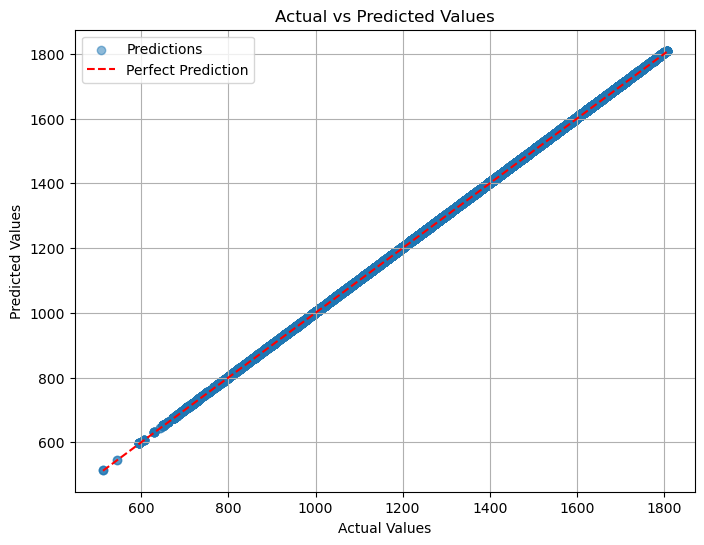

In [12]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Ensure the model is in evaluation mode
model.eval()

# Turn off gradients for evaluation
with torch.no_grad():
    # Move test inputs to device and get predictions
    X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
    y_test_tensor = torch.tensor(y_test, dtype=torch.float32).to(device)
    predictions = model(X_test_tensor).cpu().numpy().flatten()
    actual_values = y_test_tensor.cpu().numpy().flatten()

    # Calculate metrics
    mae = mean_absolute_error(actual_values, predictions)
    rmse = mean_squared_error(actual_values, predictions, squared=False)
    r2 = r2_score(actual_values, predictions)
    mape = np.mean(np.abs((actual_values - predictions) / actual_values)) * 100

    # Display metrics
    print(f"Metrics for Model Evaluation:")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"R^2 Score: {r2:.4f}")
    print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

    # Create a DataFrame to store results
    results_df = pd.DataFrame({
        "Predicted": predictions,
        "Actual": actual_values,
        "Absolute Error": np.abs(predictions - actual_values)
    })

    # Save results to CSV
    results_df.to_csv("evaluation_results.csv", index=False)
    print("Results saved to 'evaluation_results.csv'.")

    # Display first few rows of the DataFrame
    print("Sample Results:")
    print(results_df.head())

    # Find and display the top 5 largest errors
    largest_errors = results_df.nlargest(5, "Absolute Error")
    print("Top 5 largest errors:")
    print(largest_errors)

# Plot actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(actual_values, predictions, alpha=0.5, label="Predictions")
plt.plot([min(actual_values), max(actual_values)], 
         [min(actual_values), max(actual_values)], color='red', linestyle='--', label="Perfect Prediction")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.legend()
plt.grid()
plt.show()


In [10]:
# Save the TorchScript model
model_path = "simple_chess_nn.pt"

# Convert model to TorchScript using tracing or scripting
model_cpu = model.to('cpu')  # Move the model to CPU
model_scripted = torch.jit.script(model_cpu)  # Script the model

# Save the scripted model
torch.jit.save(model_scripted, model_path)
print(f"Model saved to {model_path}")


Model saved to simple_chess_nn.pt


In [16]:
import torch
import numpy as np
import matplotlib.pyplot as plt

# Example feature update function (to be customized for your specific use case)
def update_input_with_prediction(current_input, next_elo):
    """
    Updates the input features for the next prediction.
    Modify this function based on your model's input requirements.
    """
    current_input = current_input.cpu().numpy()
    
    # Assuming the first feature is the player's current ELO
    # Replace the ELO with the predicted value
    current_input[0] = next_elo  
    
    # Convert back to tensor and move to the device
    return torch.tensor(current_input, dtype=torch.float32).to(device)

# Forecasting function
def forecast_elo(model, latest_features, x_steps, device):
    """
    Forecasts ELO ratings for x steps into the future.

    Args:
        model: Trained PyTorch model.
        latest_features: Latest feature vector as input for forecasting.
        x_steps: Number of future steps to forecast.
        device: Device (CPU or GPU) where the model is running.

    Returns:
        List of future ELO predictions.
    """
    # Convert latest features to tensor
    current_input = torch.tensor(latest_features, dtype=torch.float32).to(device)

    future_predictions = []

    # Iterative prediction for x steps
    for _ in range(x_steps):
        # Predict the next ELO
        next_elo = model(current_input).item()

        # Store the prediction
        future_predictions.append(next_elo)

        # Update input features with the predicted ELO
        current_input = update_input_with_prediction(current_input, next_elo)

    return future_predictions

# Example Usage
if __name__ == "__main__":
    # Assume the model and device are already defined


    model.eval()  # Ensure the model is in evaluation mode
    device = torch.device("cpu")  # Change to "cuda" if using GPU

    # Latest features (example data)
    latest_features = y_test

    # Number of future steps to forecast
    x_steps = 10

    # Forecast ELO ratings
    future_elos = forecast_elo(model, latest_features, x_steps, device)


    # Combine historical and forecasted ELOs
    total_elos = future_elos

    # Plot the results
    plt.figure(figsize=(10, 6))
    plt.plot(range(len(historical_elos)), historical_elos, label="Historical ELO", marker='o')
    plt.plot(range(len(historical_elos), len(total_elos)), future_elos, label="Forecasted ELO", marker='o', linestyle='--')
    plt.xlabel("Games")
    plt.ylabel("ELO")
    plt.title("ELO Forecasting")
    plt.legend()
    plt.grid()
    plt.show()

    print("Forecasted ELOs:", future_elos)


RuntimeError: mat1 and mat2 shapes cannot be multiplied (193684x1 and 12x128)